### Исходные данные
<p>Данные до 2016 года вкоючительно о продажах игр, оценки пользователей и экспертов, жанры и плафтормы. </p>

### Задача  
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

### План исследования:
1. Изучим общую информацию о данных.
2. Выполним предобработку данных: обработаем пропуски, дубликаты, приведем данные в нужный формат, добавим недостающие столбцы.
3. Выполним исследовательский анализ: изучим выпуск игр в разные годы, рассмотрим как менялись продажи по платормам, выявим лидирующие платформы, рассмотрим как влияют на продажи отзыввы пользователей и критиков, посмотрим на распредление игр по жанрам.
4. Составимм портрет пользователя для каждого региона: самые популряные платформы, жанры в разных регионах, влияние рейтинга на продажи.
5. Проверим гипотезы:
- Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;
- Средние пользовательские рейтинги жанров *Action* и *Sports* разные.

#### Шаг 1. Общая информация о данных.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.ticker as ticker
plt.rcParams['figure.figsize']=(12,8)

In [6]:
try: 
    data = pd.read_csv('games.csv')
except: 
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Нам представлены данные о продоже компьютерных игр.
* Name — название игры (строка)
* Platform — платформа (строка)
* Year_of_Release — год выпуска (число с плавающей точкой)
* Genre — жанр игры (строка)
* NA_sales — продажи в Северной Америке (миллионы проданных копий) (число с плавающей точкой)
* EU_sales — продажи в Европе (миллионы проданных копий) (число с плавающей точкой)
* JP_sales — продажи в Японии (миллионы проданных копий) (число с плавающей точкой)
* Other_sales — продажи в других странах (миллионы проданных копий) (число с плавающей точкой)
* Critic_Score — оценка критиков (максимум 100) (число с плавающей точкой)
* User_Score — оценка пользователей (максимум 10) (строка)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. (строка)

В данных есть пропуски в 6 столбцах.

#### Шаг 2. Предобработка данных

1. Приведем название столбцов к нижнему регистру.

In [9]:
data.columns = data.columns.str.lower()

2. Проверим на дупликаты.

In [10]:
data.duplicated().sum()

0

Явные дупликаты не обнаружены.

Рассмотрим также дупликаты по группе: названию, жанру и году выпуска игр.

In [11]:
data[['name', 'platform', 'year_of_release']].duplicated().sum()

2

In [12]:
data.loc[data[['name', 'platform', 'year_of_release']].duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [13]:
data = data.drop(index=data.loc[data[['name', 'platform', 'year_of_release']].duplicated() == True].index)

In [14]:
data = data.reset_index(drop=True)

3. Рассмотрим пропуски в данных.

In [15]:
data['name'].isna().sum()

1

In [16]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [17]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


В одной строках есть одновременно пропуски в навзании и в наименовании жанра игр. Удалим такие строки, так как их общая доля в данных сильно мала.

In [18]:
data = data.query('~genre.isna()')

In [19]:
data['year_of_release'].isna().sum()

269

In [20]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
data['year_of_release'].isna().sum() * 100 /data.shape[0]

1.609621828626137

Доля пропусков в стобце с годом составляет 1.6%. Удалим такие данные.

In [22]:
data = data.query('~year_of_release.isna()')

In [23]:
data['critic_score'].isna().sum()

8461

In [24]:
data['user_score'].isna().sum()

6605

In [25]:
data['rating'].isna().sum()

6676

Больше всего пропусков в данных в столбцах с оценкой от критиков и пользователей и в столбце рейтинг.

Заменим пропуски в оценке критиков на заглушку.

In [26]:
data.loc[data['critic_score'].isna(), 'critic_score'] = -1

In [27]:
#for t in data['user_score'].unique():
#   data.loc[(data['user_score'] == t) & (data['critic_score'].isna()), 'critic_score'] = \
#   data.loc[(data['user_score'] == t), 'critic_score'].mean()

In [28]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN


In [29]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [30]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


В данных с оценкой пользователя есть  2376 строк со значением 'tbd'. Такие данные возникают, когда решенеи еще не принято, то есть оценка еще не дана, но дана будет. Удалив такие данные , мы потерем большую долю данных, поэтому заменим такие данные средним в зависимости от критической оценки.

Так как изначально тип данных строка, то для преобразований нам необходимо изменить тип данных на число с плавающей точкой, для этого необходимо заменить данные tbd. Так как изначально в данных user_score есть нулевые значени, то заменять на 0 твкие данные нельзя. Заменим их на ново число. Аналогично проделаем с пропущенными значениями - заменим их на -2.

In [31]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

In [32]:
data.loc[data['user_score'].isna(), 'user_score'] = -1

In [33]:
#for t in data['critic_score'].unique():
#    data.loc[(data['critic_score'] == t) & (data['user_score'] == -1), 'user_score'] = \
#    data.loc[(data['critic_score'] == t), 'user_score'].mean()

In [34]:
#for t in data['critic_score'].unique():
#    data.loc[(data['critic_score'] == t) & (data['user_score'].isna()), 'user_score'] = \
#    data.loc[(data['critic_score'] == t), 'user_score'].mean()

Заменим пропуски в данных с рейтингом.

In [35]:
data.loc[data['rating'].isna(), 'rating'] = 'not rated'

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


4. Приведем данные в нужный формат

Приведем данные с годом в формат целого числа. 

In [37]:
data['year_of_release'] = data['year_of_release'].astype(int)

Оценку критиков приведем в формат целочисленного типа, данные с оценкой пользователя приведем в формат числа с плавающей точкой.

In [38]:
data['critic_score'] = data['critic_score'].astype(int)

In [39]:
data['user_score'] = data['user_score'].astype(float)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


5. Добавим столбец с суммарой продажей игр во всех регионах.

In [41]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [42]:
data = data.reset_index(drop=True)

#### Промежуточный вывод:
На этом предобработка данных завершена: были обнаружены 2 строки с дупликатыми данных, приведены типы данных с соценкой критиков - в формат целого чсисла, данные с годом создания игры в формат целого числа, данные с оценкой пользователй в формат плавающей точки, названия столбцов приведены к нижнему регистру и добавлен сстолбец с суммарным количеством проданных копий. Также были обнвружены пропуски:
- в столбцах имя и жанр игры пропуски одновременно ыбли в двух строках, такие пропуски могли возникнуть в результате технической ошибки при загрузке данных.
- 269 строк с пропущенным значением года создания игры, в таких пропусках не было закономерностей с отсальными данными, поэтому пропуски случайны, они могли возникнуть в результате техничсекой ошибки, ошибки в предоставление данных (год игры могли просто не предоставить). Так как доля таких пропусков незначительная, мы удалили эти данные.
- пропуски в данных с оценкой критиков и пользователей. Так как такие данные заполняются средним по оценки определенной игры, пропуски могли возникнуть в результате недостаточного количества оценки для одной игры. Пропуски в этих данных мы заменили на заглушки.
- пропуски в данных с рейтингом, так как рейтинг ESRB существует только для стран США и Канады, то пропуски логичны в играх выпущенных не для данных стран.

In [43]:
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sales            16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

#### Шаг 3. Исследовательский анализ данных.

1. Рассмотрим сколько игр выпускалось в разные годы.

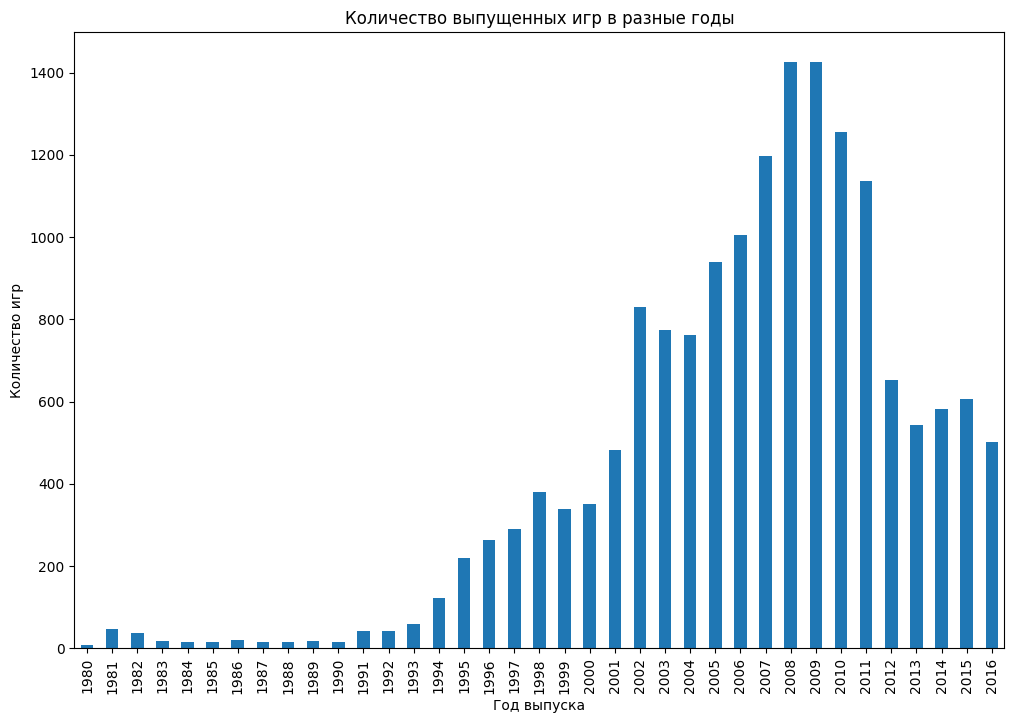

In [44]:
data.groupby('year_of_release')['name'].count().reset_index().plot(x='year_of_release', y='name', kind='bar', \
xlabel='Год выпуска', ylabel='Количество игр', title='Количество выпущенных игр в разные годы', legend=False)
plt.show()

До 1993 года количество выпущенных игр было незначительным. Начиная с 1994 года начианется рост в выпуске игр, при этом наибольшее количество игр было выпущено в 2008 и 2009 году, далее количество выпущенных игр пошло на спад. Данные за весь период для пргноза 2017 года нам не понадобятся, ориентироваться будем на данные за последние 10 лет.

2. Рассмотрим как менялись продажи данных по платформам.

In [45]:
print('10 плафторм с наибольшим количеством суммарных продаж:', )
print(data.groupby('platform')['sales'].sum().sort_values(ascending=False).head(10))

10 плафторм с наибольшим количеством суммарных продаж:
platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sales, dtype: float64


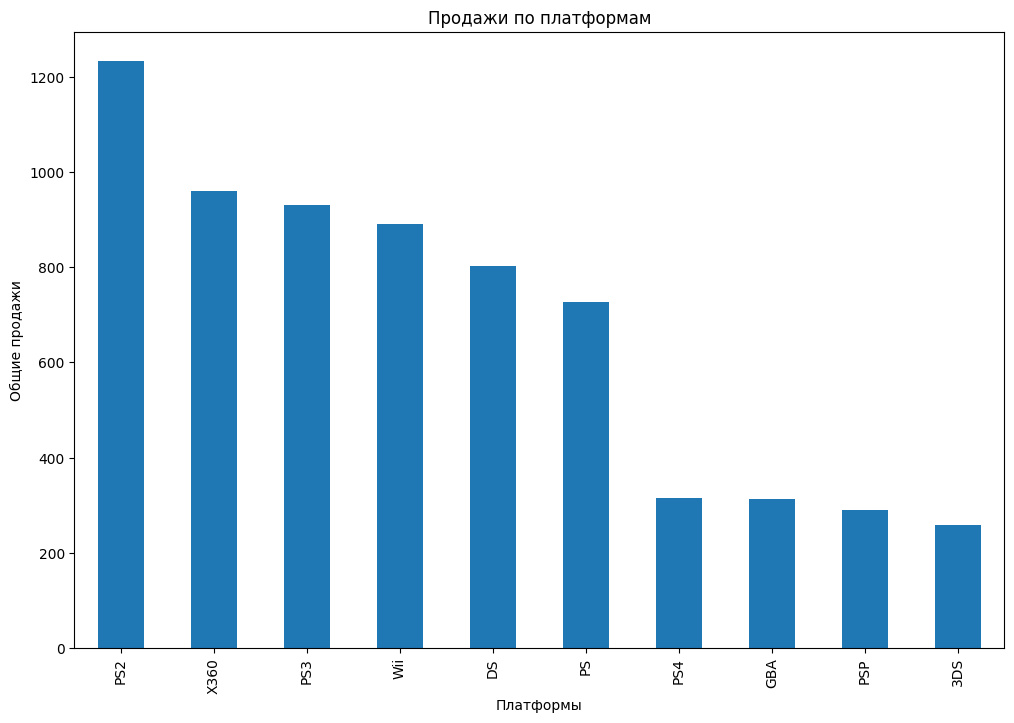

In [46]:
data.groupby('platform')['sales'].sum().sort_values(ascending=False).head(10).reset_index().plot(x='platform', y='sales', kind='bar', \
xlabel='Платформы', ylabel='Общие продажи', title='Продажи по платформам', legend=False)
plt.show()

In [47]:
def graphics_platform(platfrom,df):
    df.loc[df['platform'] == platfrom].pivot_table(index='year_of_release', values='sales', aggfunc='sum').plot()
    plt.title(f'Суммарные продажи в разные годы выпсука на платформе {platfrom}')
    plt.xlabel('Год выпуска', color='gray')
    plt.ylabel('Количество игр', color='gray')
    return plt.show()

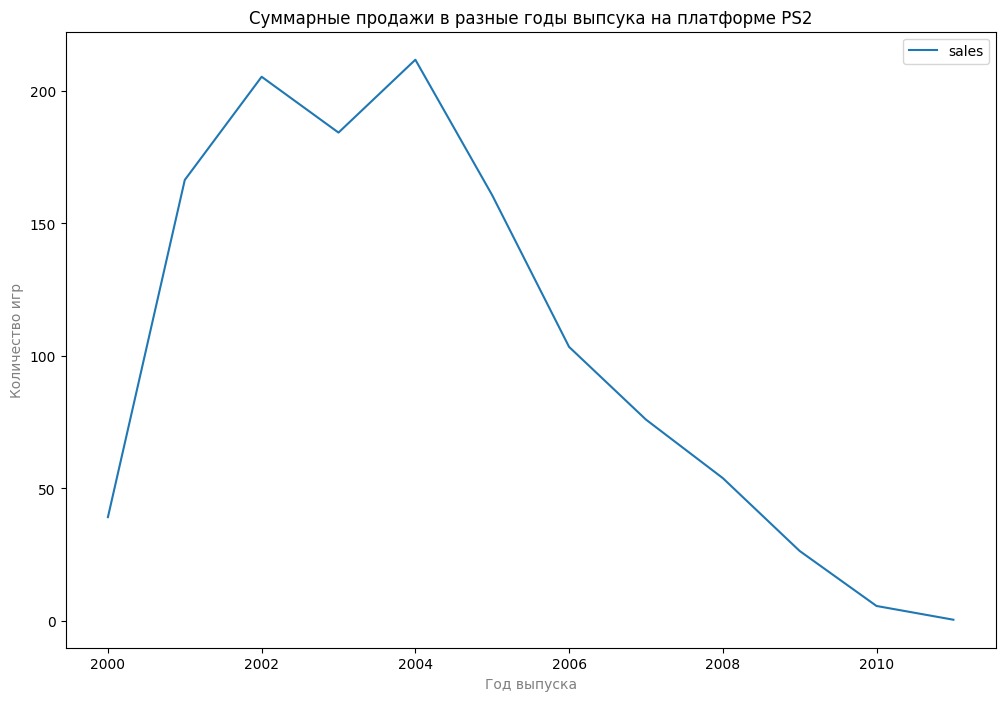

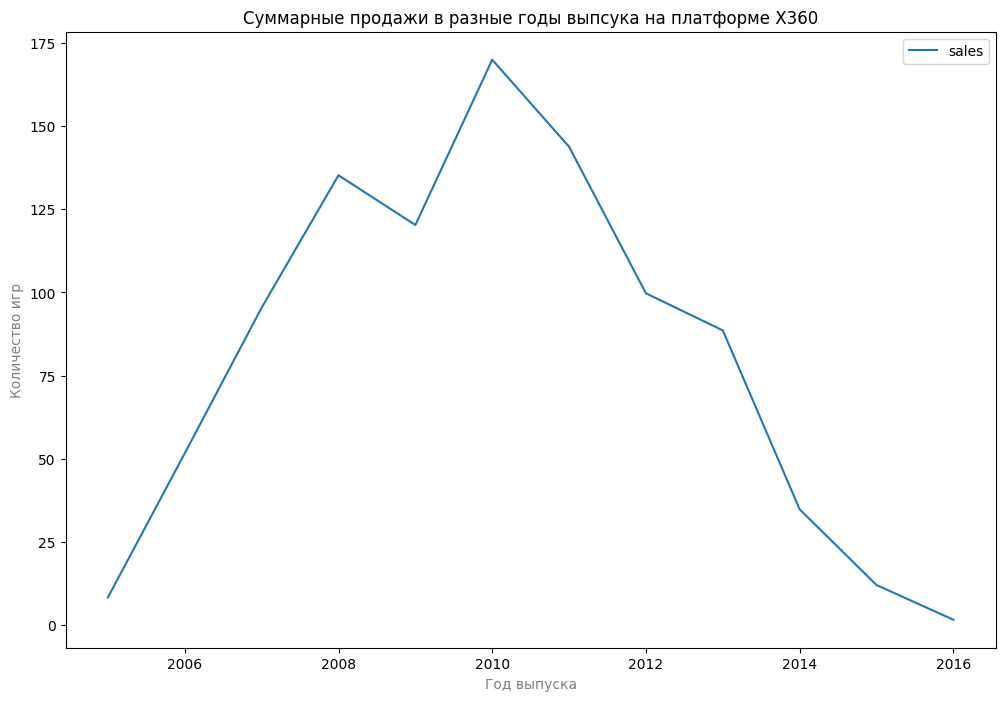

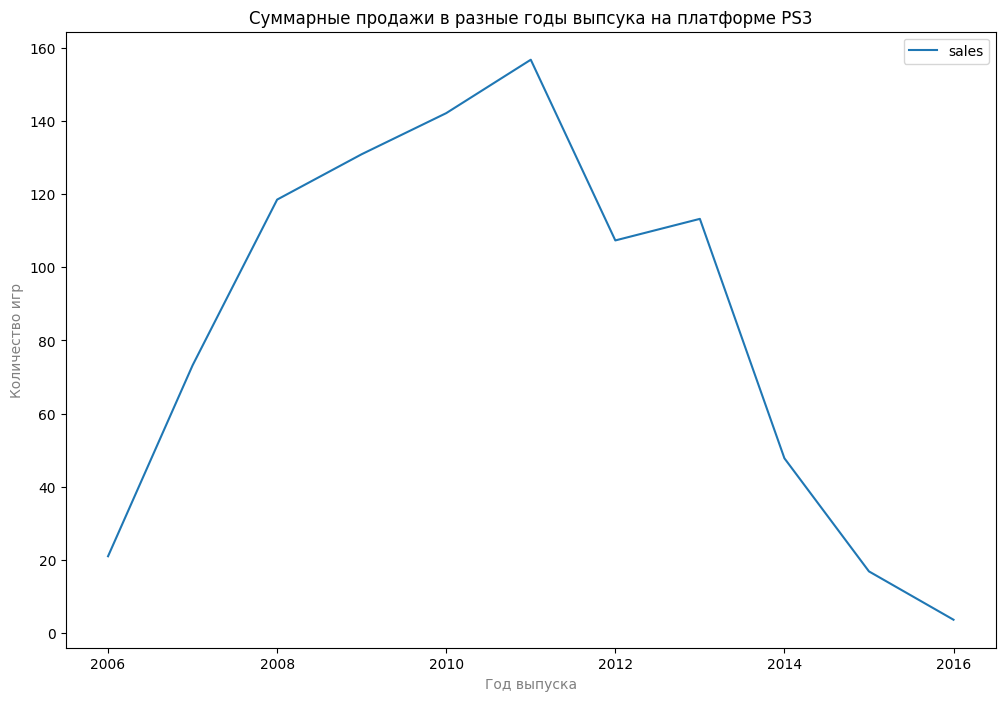

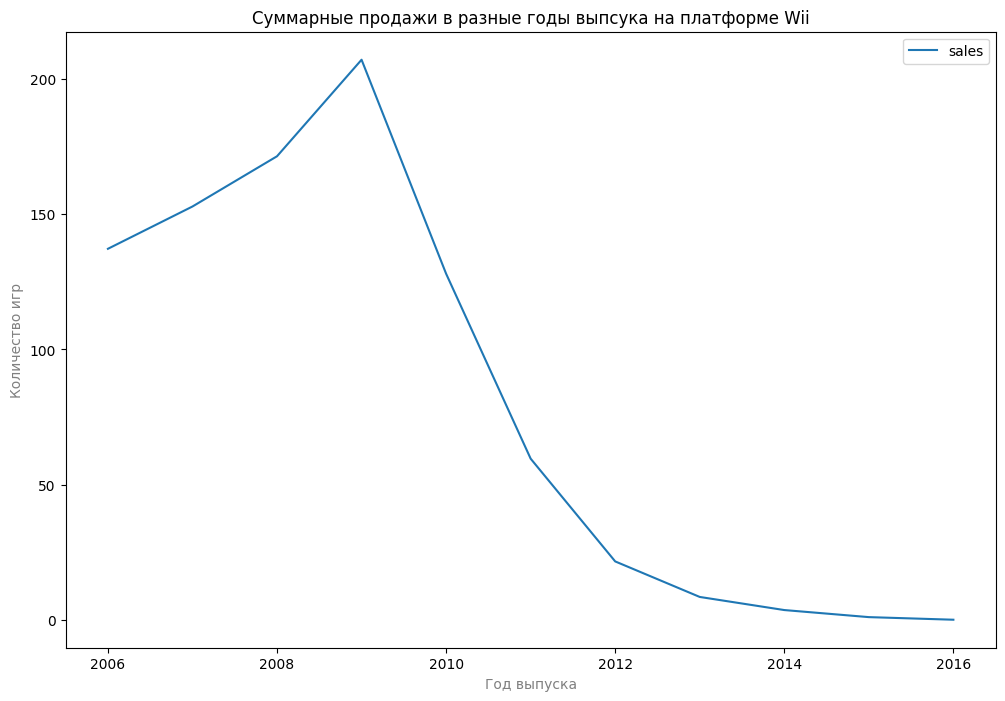

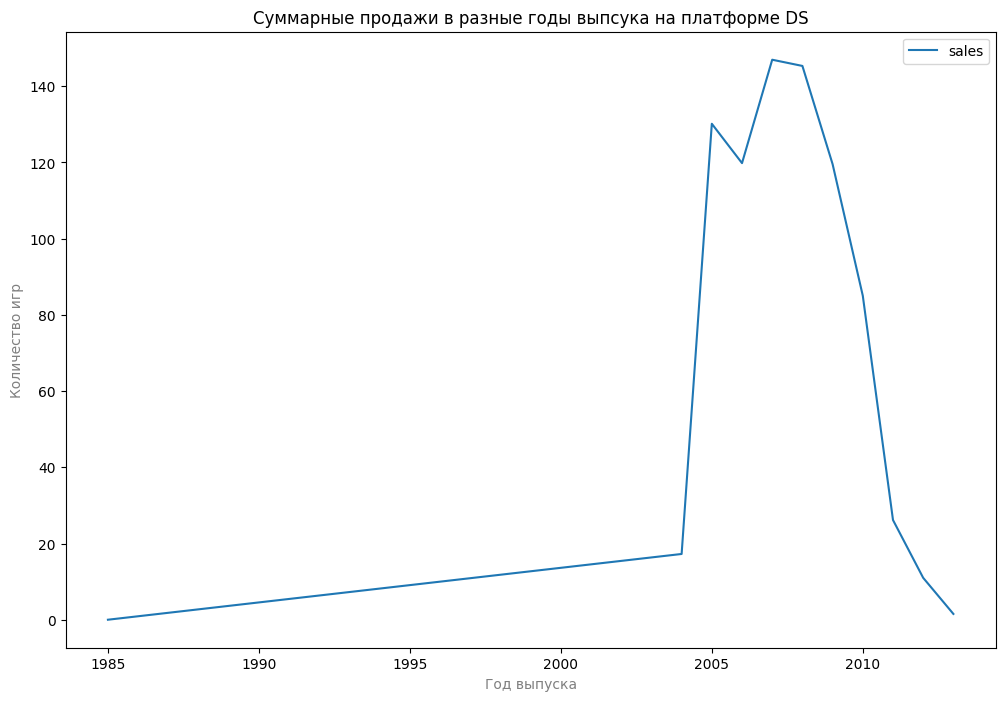

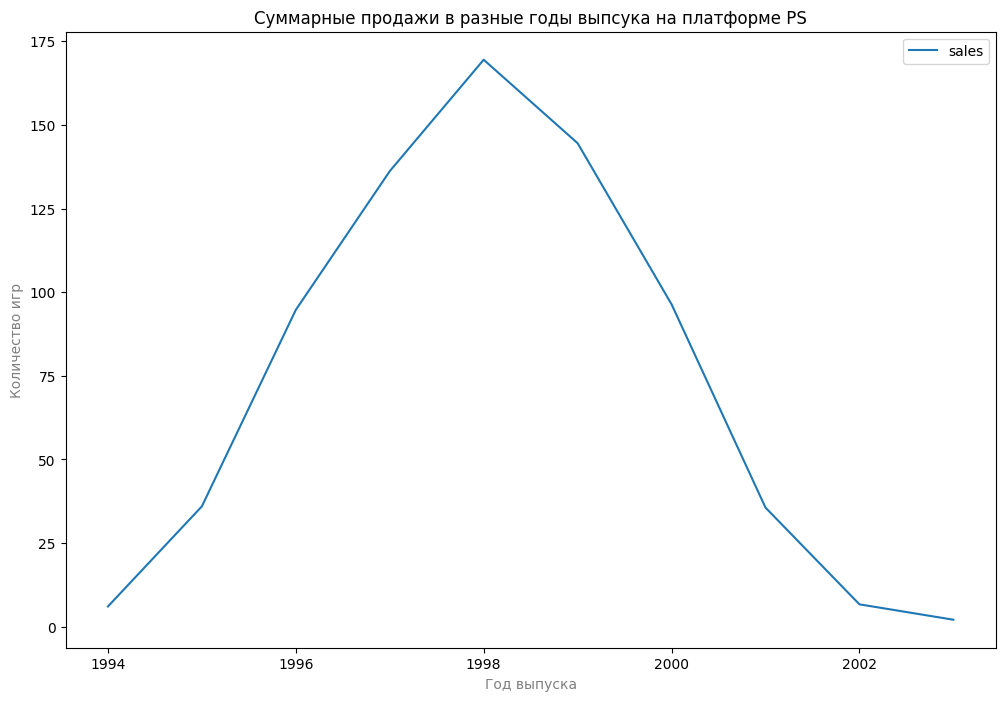

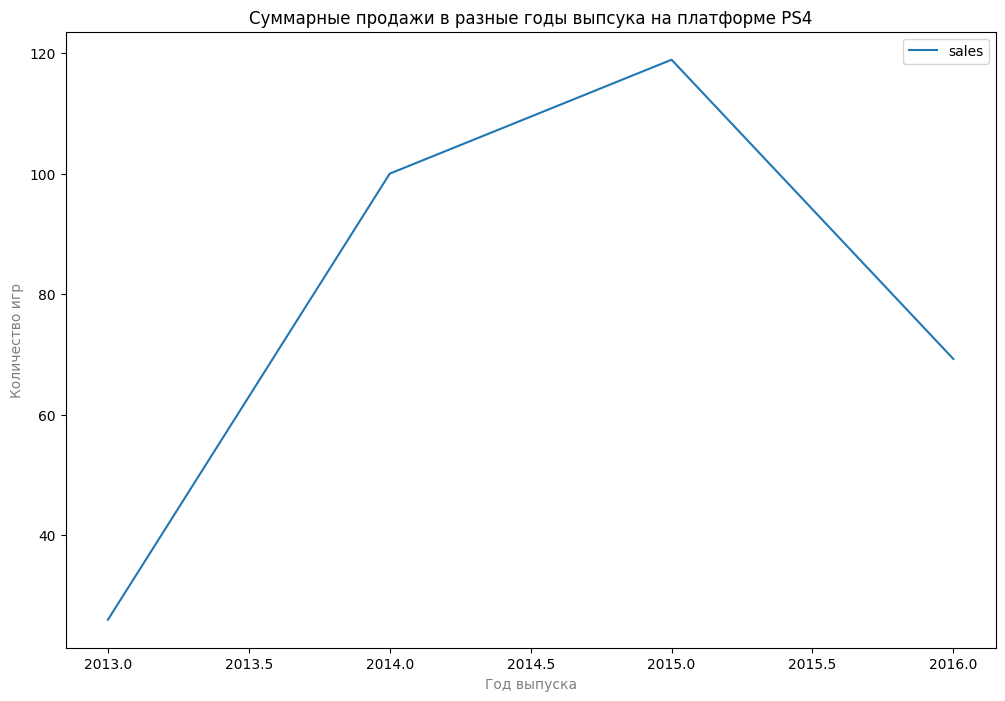

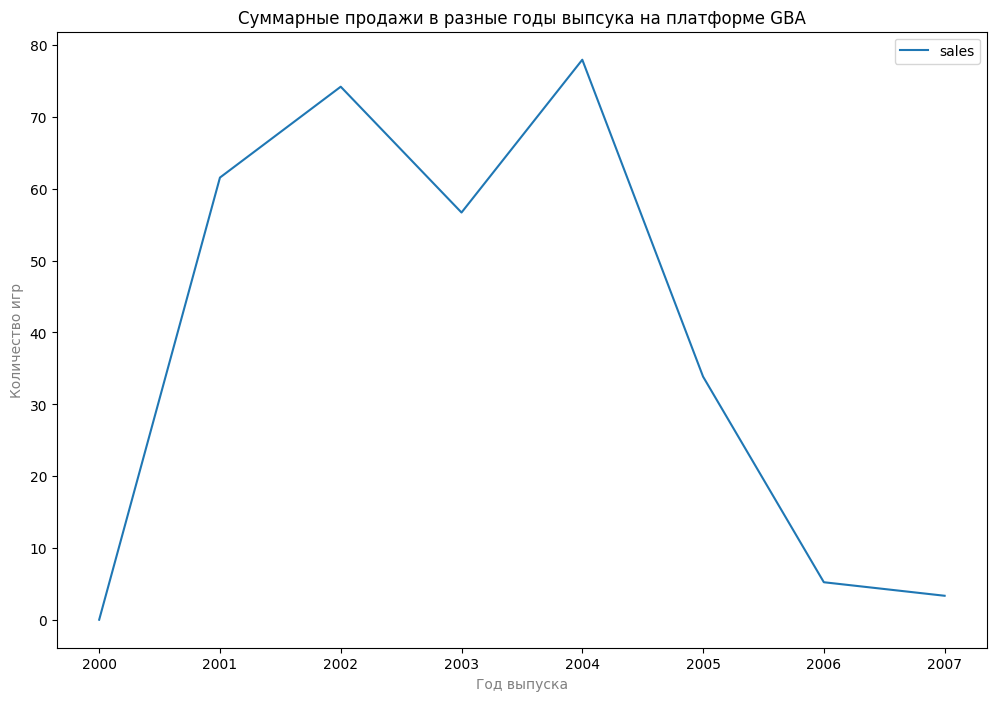

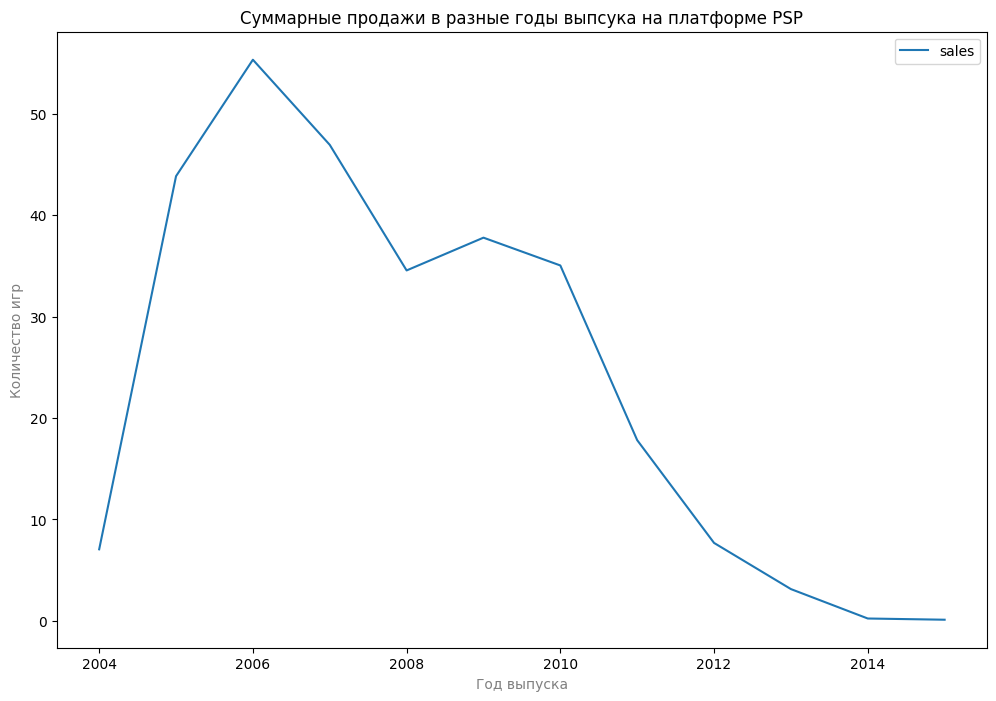

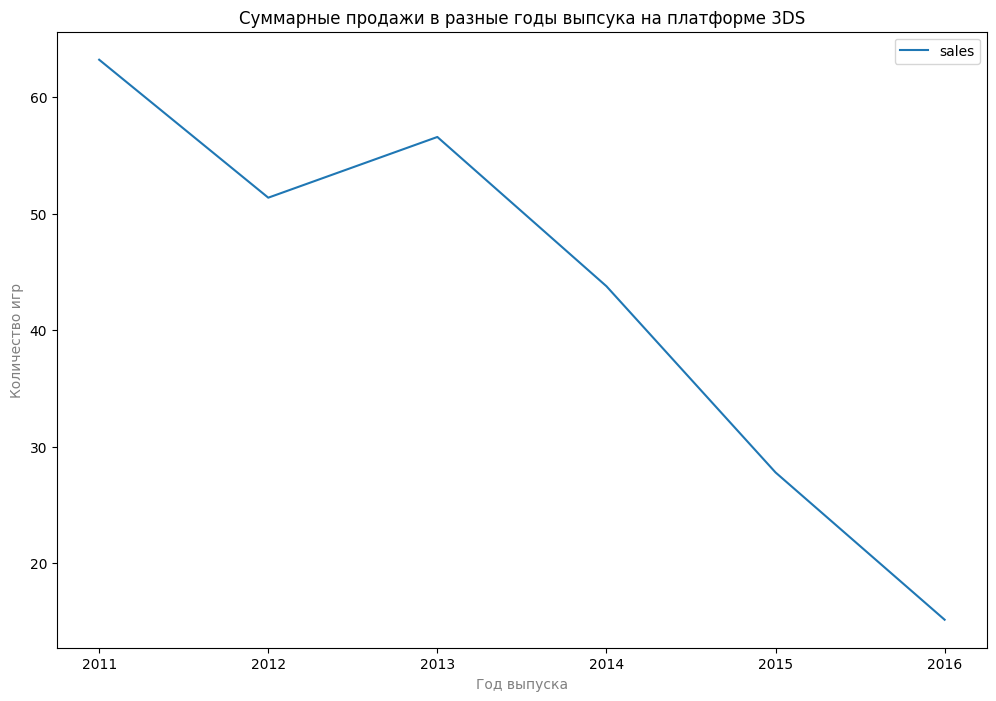

In [48]:
for i in data.groupby('platform')['sales'].sum().sort_values(ascending=False).head(10).index:
    graphics_platform(i, data)

In [49]:
data[data['platform'] == 'DS']['year_of_release'].unique()

array([2006, 2005, 2010, 2009, 2004, 2007, 2012, 2008, 2011, 2013, 1985])

In [50]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,not rated,0.02


Консоль DS вышла в 2004 году, поэтому строка с годом выпуска игры в 1985 является ошибочной, удалим ее и перестроим график.

In [51]:
data = data.query('~(platform == "DS" & year_of_release== 1985)')

In [52]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,not rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,not rated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,not rated,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,not rated,0.01


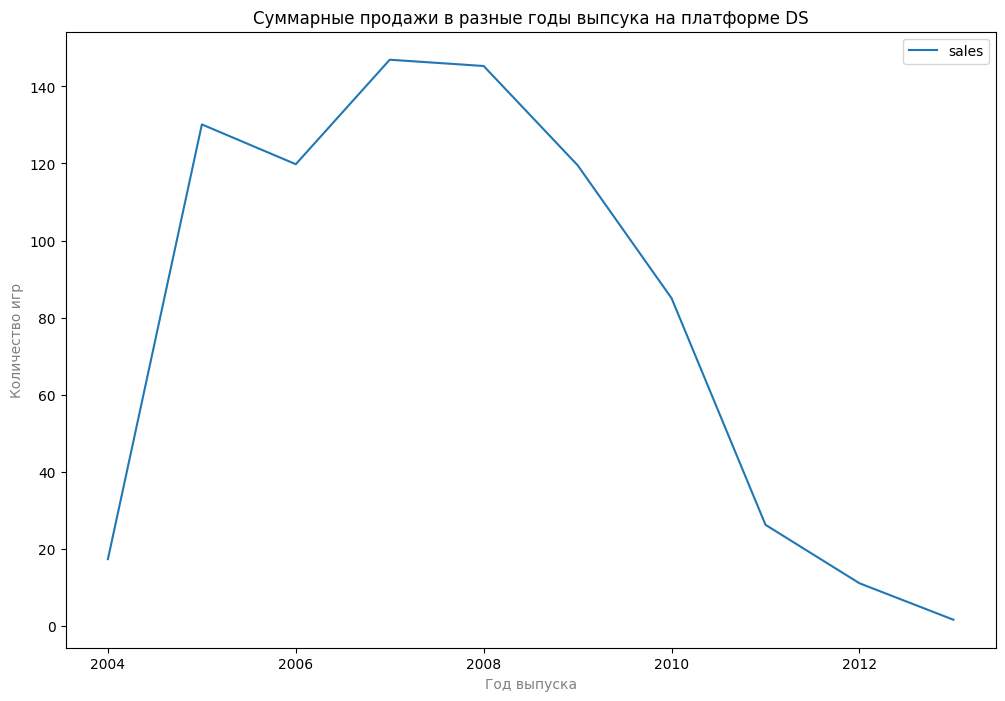

In [53]:
graphics_platform("DS", data)

Расссмотрим детальнее сколько лет существует каждая платформа.

In [54]:
d3 = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
#d3 = d3.loc[data.groupby('platform')['sales'].sum().sort_values(ascending=False).head(10).index]
d3['dif'] = d3['max'] - d3['min'] + 1
d3

,min,max,dif
platform,,,
2600,1980,1989,10
3DO,1994,1995,2
3DS,2011,2016,6
DC,1998,2008,11
DS,2004,2013,10
GB,1988,2001,14
GBA,2000,2007,8
GC,2001,2007,7
GEN,1990,1994,5


Найдем среднее количество лет существования платформы.

In [55]:
d3['dif'].median()

7.0

In [56]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

На примере платформы PS можно рассмотреть, что с момента появления страших версий до момента исчезновения старой проходит примерно 4 года. Также срок жизни каждой платформы примерно 7 лет.

Таким образом, возьмем за актуальный период для прогноза 2017 года данные выпущенных игр последние 4 года, это поможет нам спрогнозировать 2017 год с учетом тех игр, которые закончили уже свой цикл.

In [57]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,not rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,not rated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,not rated,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,not rated,0.01


In [58]:
data_act = data.query('year_of_release > 2013')

In [59]:
data_act = data_act.reset_index(drop=True)

In [60]:
data_act

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,not rated,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,not rated,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,not rated,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01


Рассмотрим данные по каждой платформе, представленные за актуальный период.

In [61]:
data_act.groupby('platform')['sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: sales, dtype: float64

Таким образом лидирующая платформа игр, выпущенных за последние 4 года - PS4,следующая за ней XOne.

In [62]:
def graphics_platform1(platfrom,df):
    df.loc[df['platform'] == platfrom].pivot_table(index='year_of_release', values='sales', aggfunc='sum').plot()
    plt.title(f'Суммарные продажи в разные годы выпсука на платформе {platfrom}')
    plt.xlabel('Год выпуска', color='gray')
    plt.ylabel('Количество игр', color='gray')
    plt.xticks(np.arange(2014, 2017, step=1))
    return plt.show()

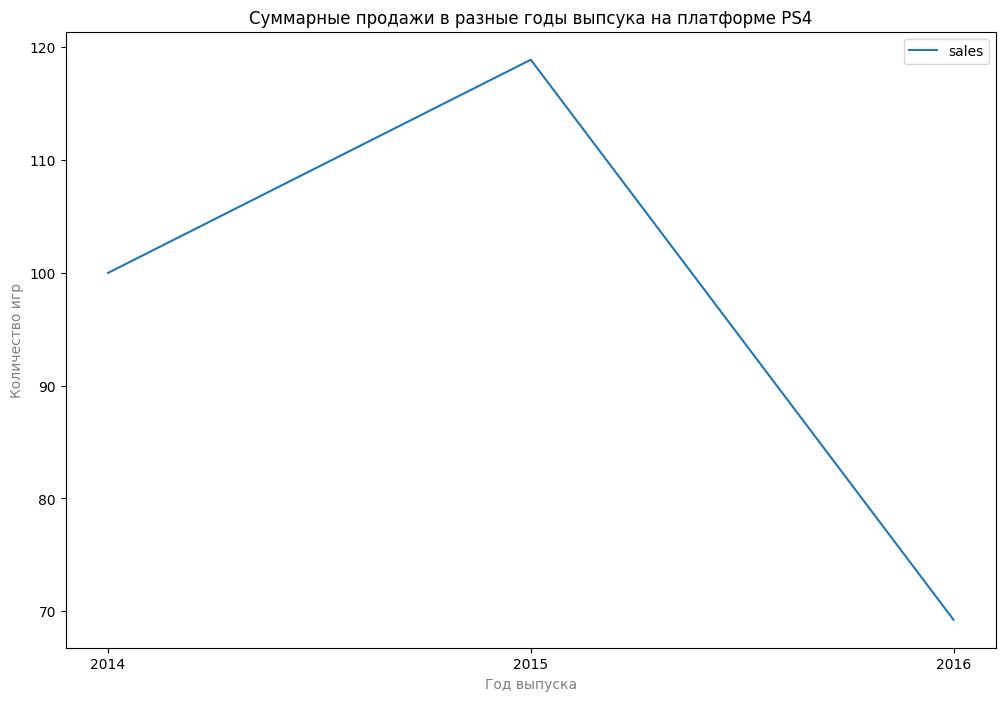

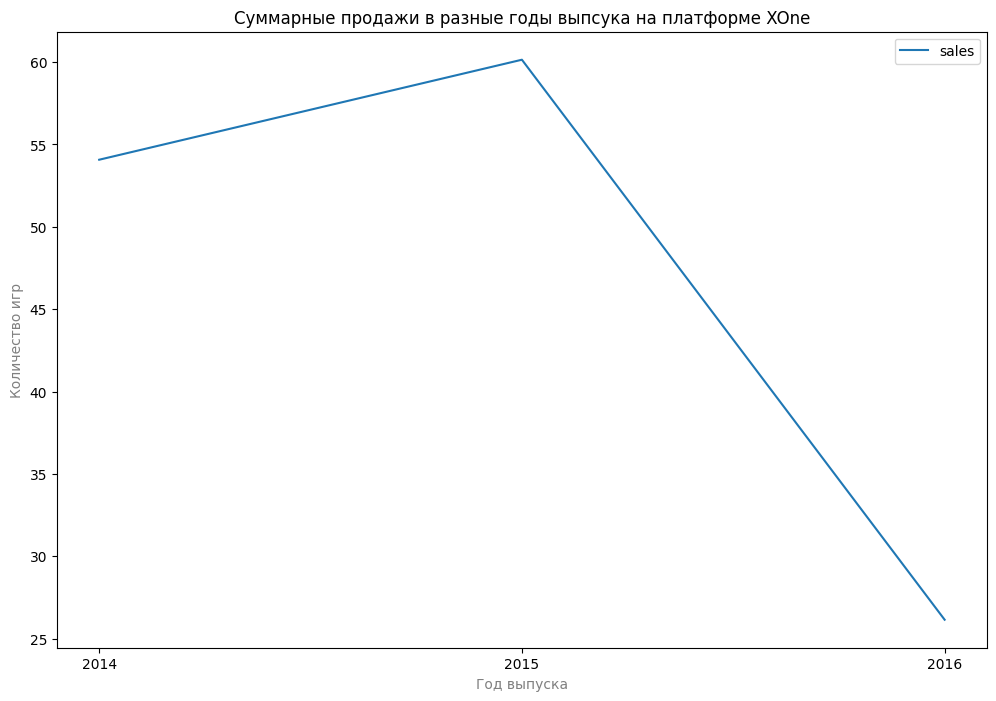

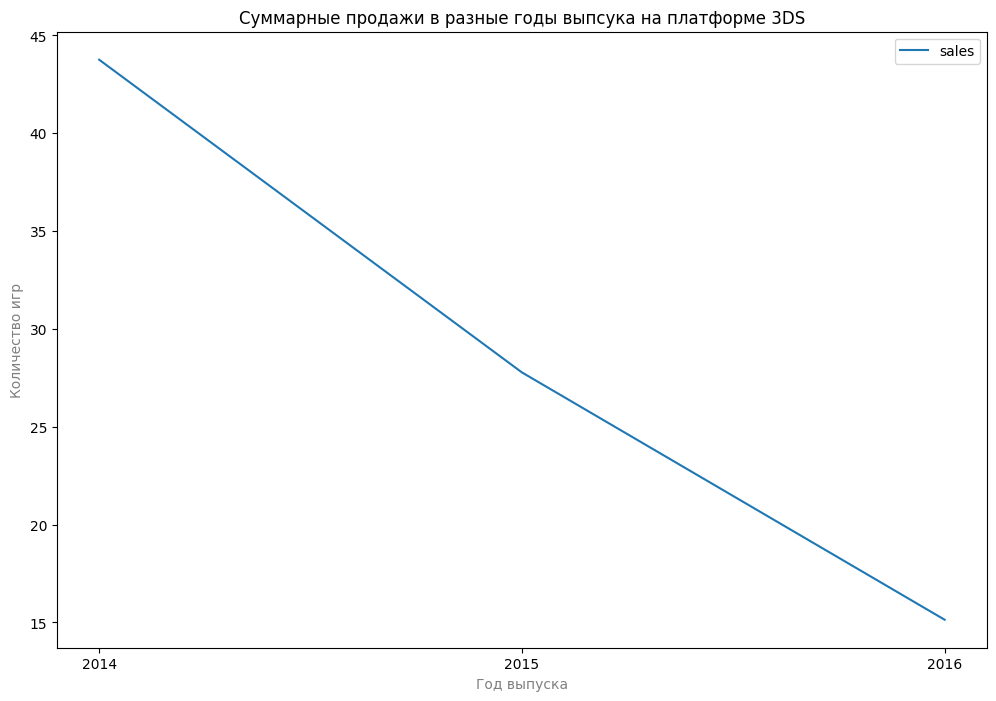

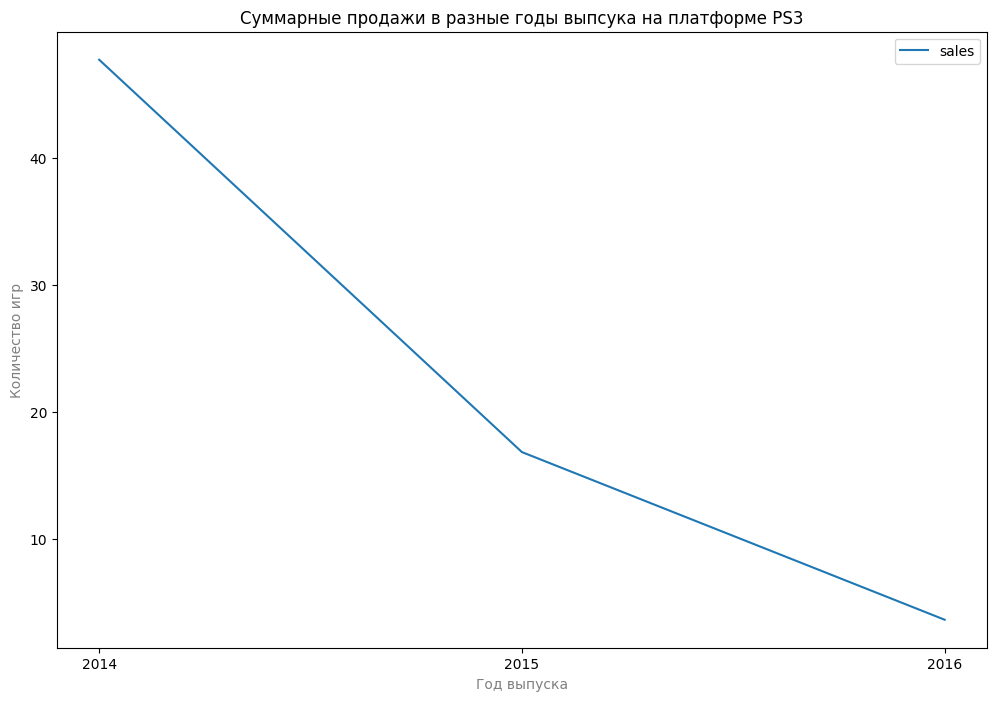

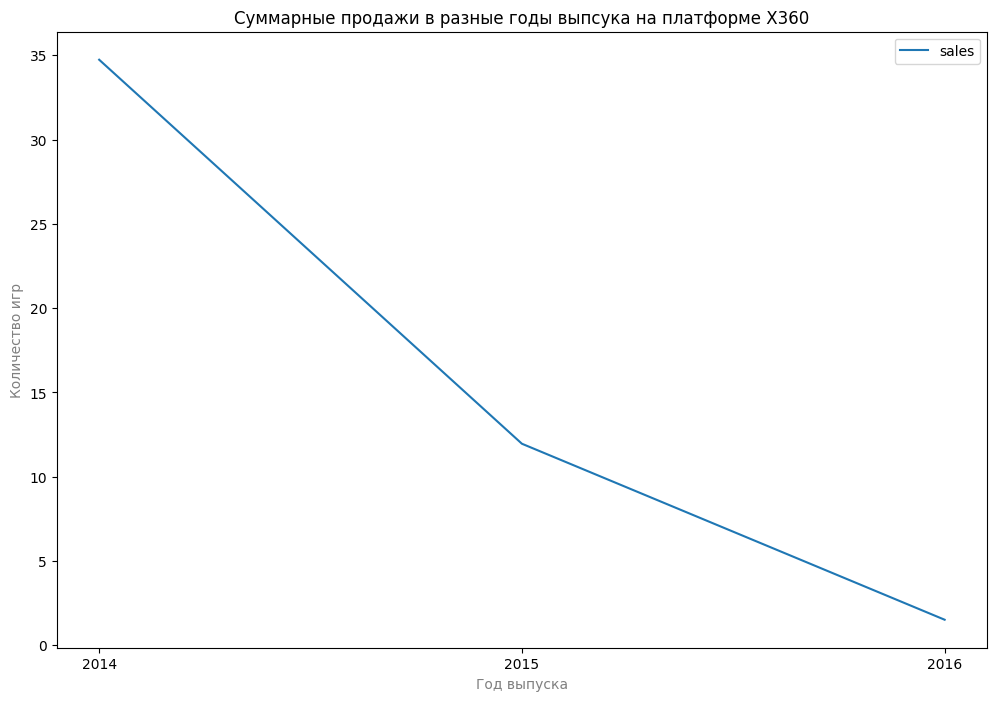

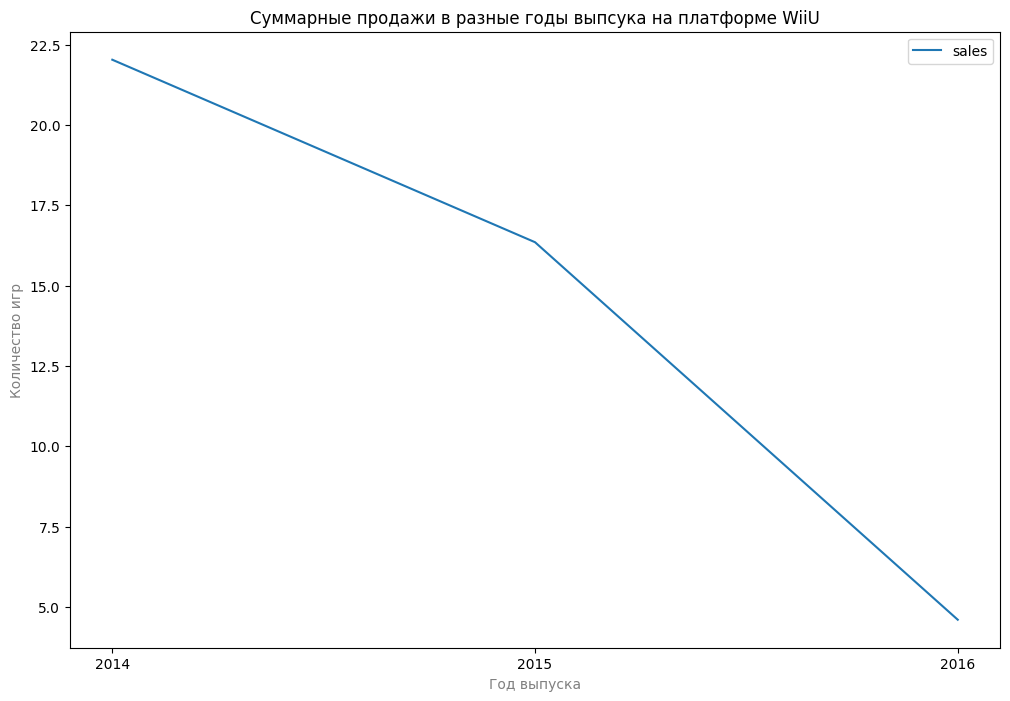

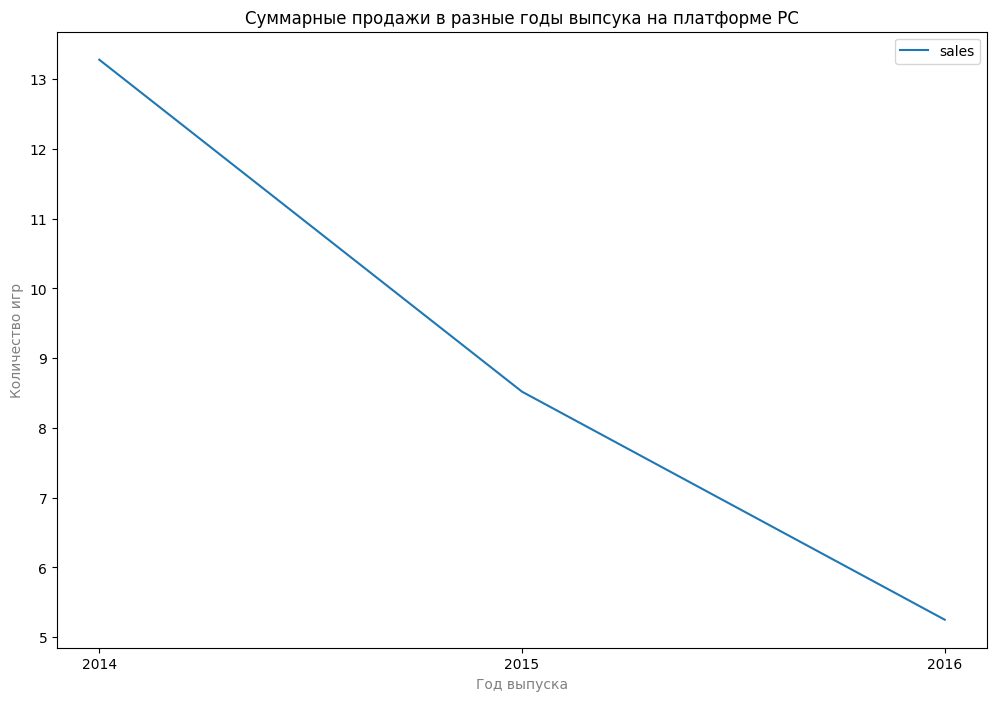

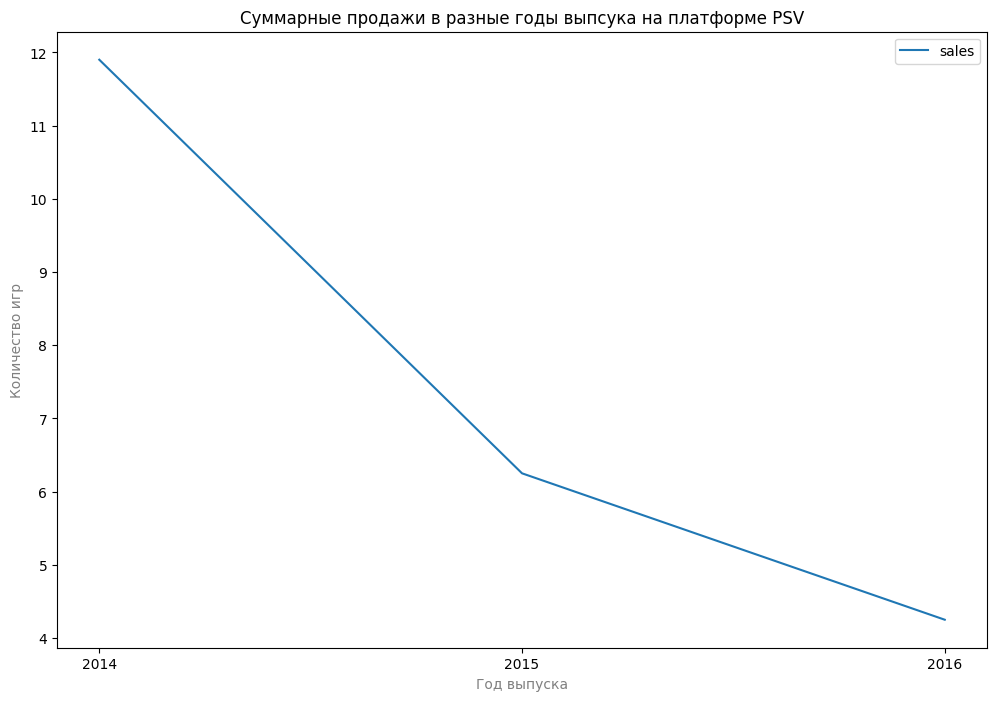

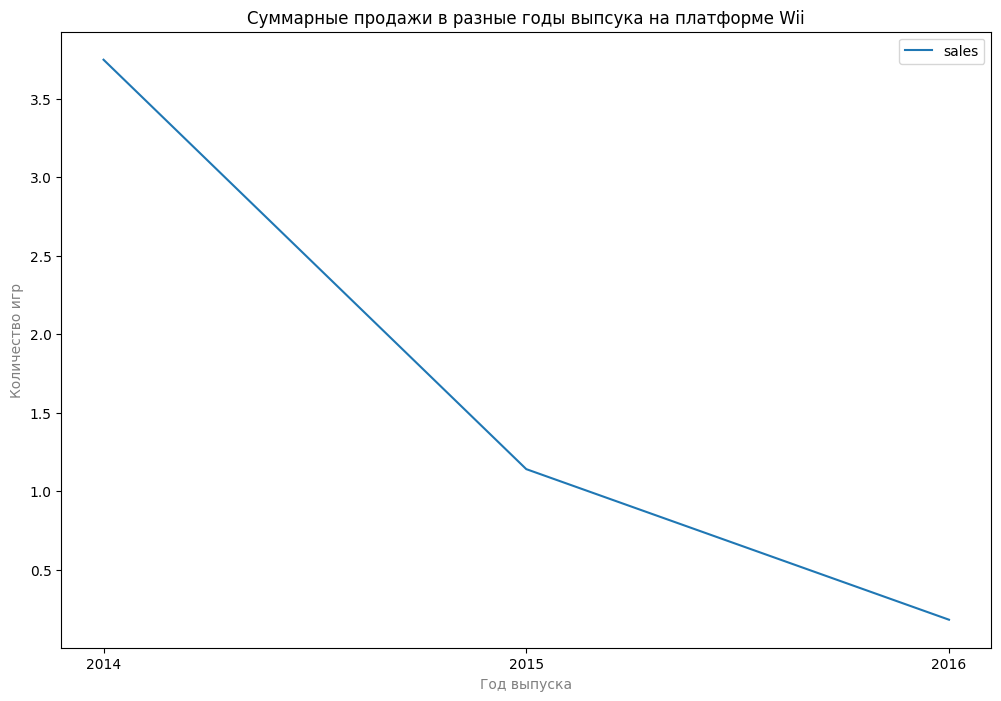

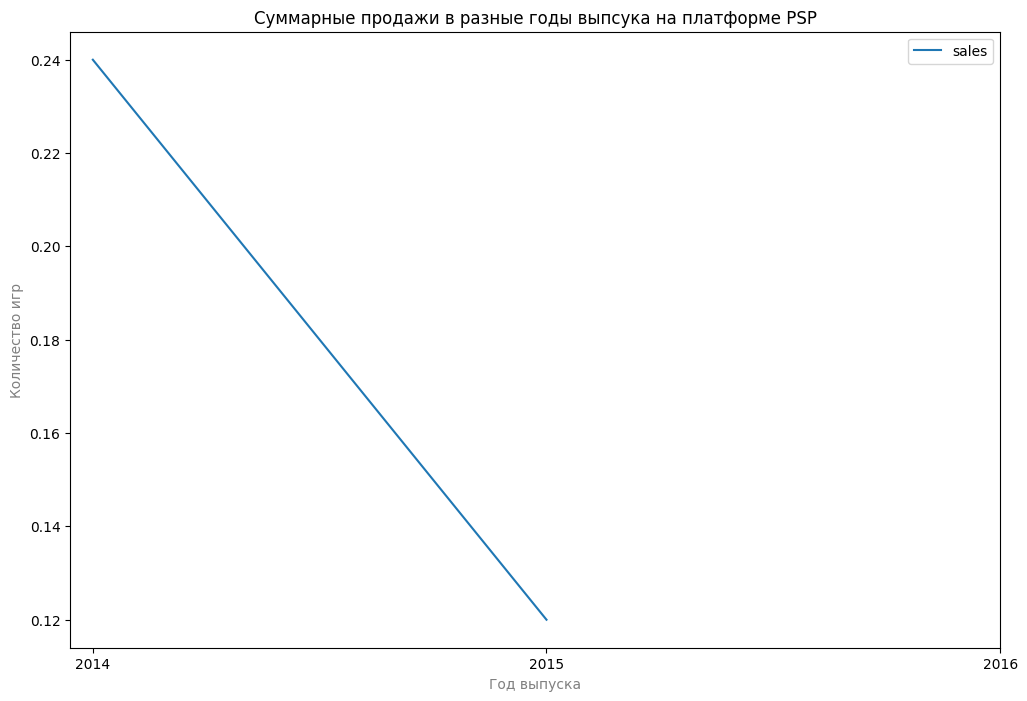

In [63]:
for i in data_act.groupby('platform')['sales'].sum().sort_values(ascending=False).head(10).index:
    graphics_platform1(i, data_act)

Платформы PS3, X360, Wii, PSP - находятся на крайнйе стадии своего сущесвтования и падают по продажам выпущенных игр, соответсвенно в 2017 году продаж на этих плфтормах не будет или будут незначительные.

Платформы PS4, XOne, WiiU - находятся на этaпе своего роста и развития, поэтому основные суммарные продажи следует ожидать от этих платформ.

Плафтормы 3DS,PC, PSV находится на спаде, но пару лет продержаться еще может.

Построим распределение данных по глобальным продажам в разбивке на платформы.

In [65]:
data_act

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,not rated,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,not rated,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,not rated,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01


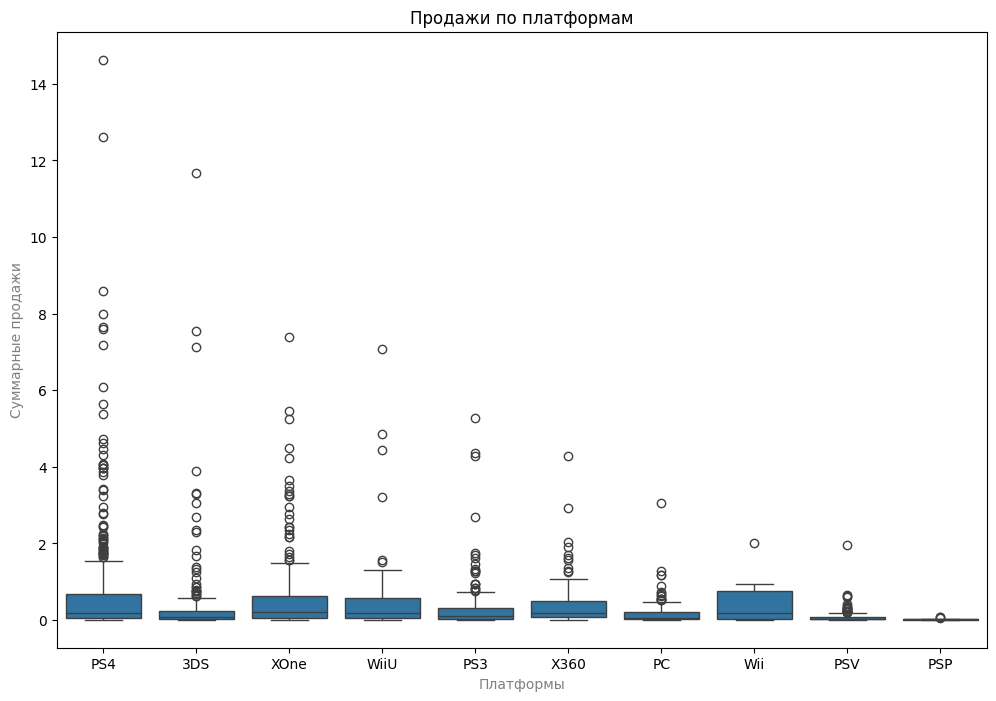

In [66]:
#sns.boxplot(x='platform', y='sales', data=data_boxplot)
sns.boxplot(x='platform', y='sales', data=data_act).set_title('Продажи по платформам')
plt.xlabel('Платформы', color='gray')
plt.ylabel('Суммарные продажи', color='gray')
plt.show()

Рассмотрим масштабированный график без выбросов.

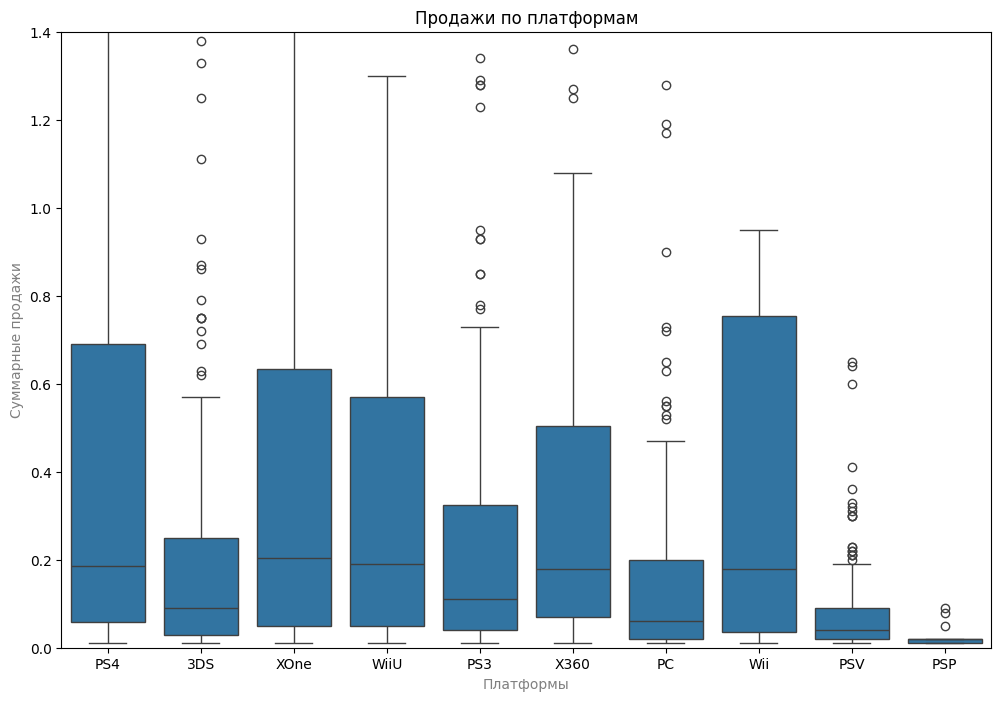

In [68]:
sns.boxplot(x='platform', y='sales', data=data_act).set_ylim(bottom=0, top=1.4)
plt.title('Продажи по платформам')
plt.xlabel('Платформы', color='gray')
plt.ylabel('Суммарные продажи', color='gray')
plt.show()

Среднее значение по количеству проданных копий  каждой игры на приведенных плафтормах примерно одинаково и равно 0.2 млн проданных копий на плафтормах PS4, XOne, WiiU, X360, Wii. Меньше всего проданнных копий было на платформе PSP. У платформ PS4,  Wii, Xone и WiiU стабильно высокие продажи, соотвественно стоит ориентироваться на них.

Расммотрим данные в рамках одной популярной платформы PS4. 

In [69]:
data_ps4 = data_act.query('platform == "PS4"')

In [70]:
data_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,not rated,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,not rated,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
1627,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,not rated,0.01
1629,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1636,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
1637,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


Рассмотрим как влияют на продажи отзывы пользователей и критиков.

Перед анализом необходимо отфильтровать данные без заглушек.

In [71]:
#data_ps4_score =  data_ps4.query('critic_score != -1 & user_score != -1 & user_score != -2')

In [72]:
data_ps4_user = data_ps4.query('user_score != -1')

In [73]:
data_ps4_critic = data_ps4.query('critic_score != -1')

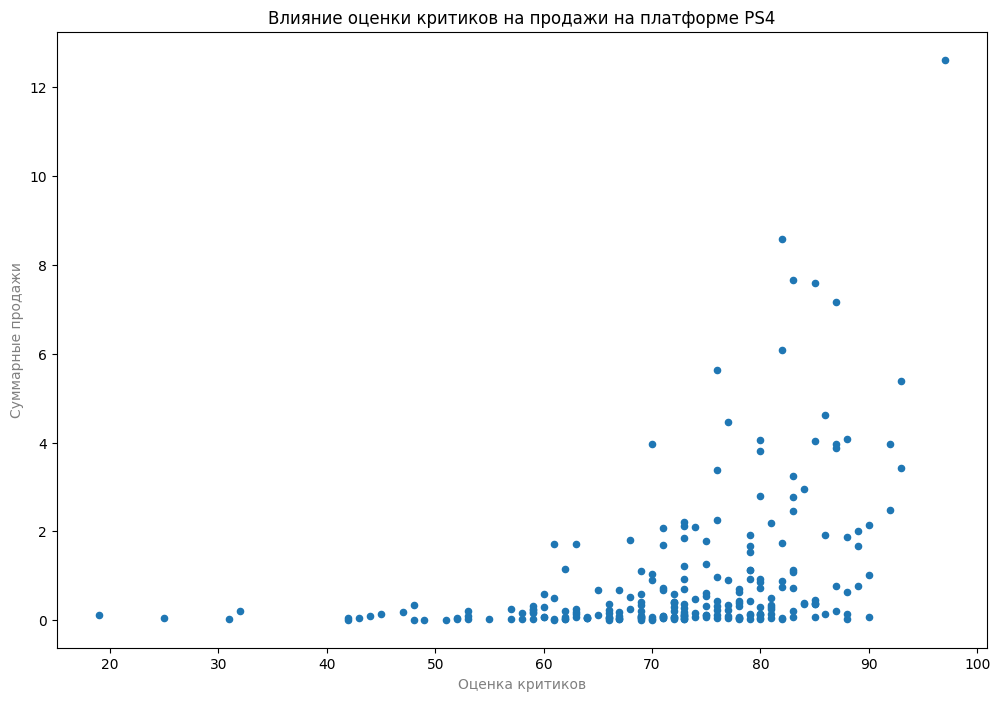

In [75]:
data_ps4_critic.plot(x='critic_score', y='sales', kind='scatter')
plt.title('Влияние оценки критиков на продажи на платформе PS4')
plt.xlabel('Оценка критиков', color='gray')
plt.ylabel('Суммарные продажи', color='gray')
plt.show()

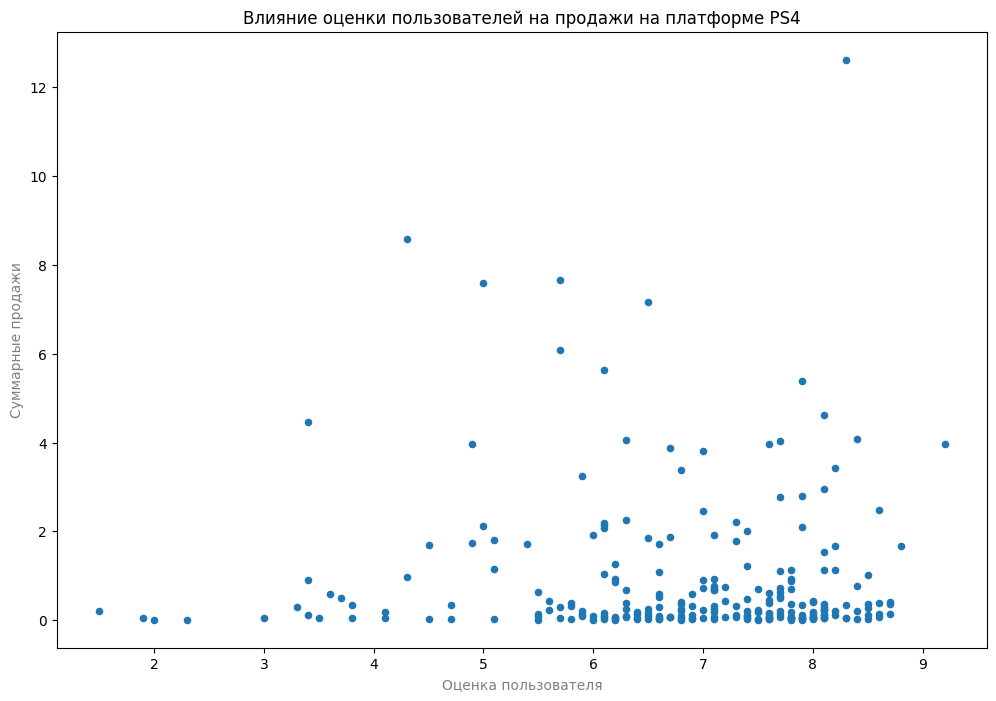

In [76]:
data_ps4_user.plot(x='user_score', y='sales', kind='scatter')
plt.title('Влияние оценки пользователей на продажи на платформе PS4')
plt.xlabel('Оценка пользователя', color='gray')
plt.ylabel('Суммарные продажи', color='gray')
plt.show()

Корреляция оценки критиков с общими продажами.

In [78]:
data_ps4_critic[['critic_score', 'sales']].corr()

,critic_score,sales
critic_score,1.000000,0.402661
sales,0.402661,1.000000


Корреляция оценки пользователей с общими продажами.

In [79]:
data_ps4_user[['user_score', 'sales']].corr()

,user_score,sales
user_score,1.000000,-0.040132
sales,-0.040132,1.000000


Оценки критиков и пользователей незначительно влияют на продажи, при этом вляиние оценки критиков выше, чем вляиние оценки пользователей. Влияние оценки пользователей отрицательно.

Рассмотрим аналогично корреляцию на других популярных платформах.

Уберем выбросы в оценках пользователей и критиков.  Для оценки корреляции отдельно отфилльтруем значения с пропусками для критиков и с пропусками для пользователей.

In [80]:
data_act_user = data_act.query('user_score != -1')

In [81]:
data_act_critic = data_act.query('critic_score != -1')

In [82]:
platform = ['WiiU', 'XOne', 'PS3', 'X360', '3DS' ]

In [134]:
def corr_critic(platform):
    print(f'Корреляция оценки критиков с суммарными продажами для платформы {platform}')
    display(data_act_critic.query('platform == @platform')[['critic_score', 'sales']].corr())
    print()

In [135]:
def corr_user(platform):
    print(f'Корреляция оценки пользователей с суммарными продажами для платформы {platform}')
    display(data_act_user.query('platform == @platform')[['user_score', 'sales']].corr())
    print()

In [136]:
for i in platform:
    corr_critic(i)

Корреляция оценки критиков с суммарными продажами для платформы WiiU


,critic_score,sales
critic_score,1.000000,0.370201
sales,0.370201,1.000000



Корреляция оценки критиков с суммарными продажами для платформы XOne


,critic_score,sales
critic_score,1.000000,0.428677
sales,0.428677,1.000000



Корреляция оценки критиков с суммарными продажами для платформы PS3


,critic_score,sales
critic_score,1.000000,0.446575
sales,0.446575,1.000000



Корреляция оценки критиков с суммарными продажами для платформы X360


,critic_score,sales
critic_score,1.000000,0.525723
sales,0.525723,1.000000



Корреляция оценки критиков с суммарными продажами для платформы 3DS


,critic_score,sales
critic_score,1.000000,0.314117
sales,0.314117,1.000000


In [137]:
for i in platform:
    corr_user(i)

Корреляция оценки пользователей с суммарными продажами для платформы WiiU


,user_score,sales
user_score,1.000000,0.407926
sales,0.407926,1.000000



Корреляция оценки пользователей с суммарными продажами для платформы XOne


,user_score,sales
user_score,1.000000,-0.070384
sales,-0.070384,1.000000



Корреляция оценки пользователей с суммарными продажами для платформы PS3


,user_score,sales
user_score,1.000000,-0.166761
sales,-0.166761,1.000000



Корреляция оценки пользователей с суммарными продажами для платформы X360


,user_score,sales
user_score,1.000000,-0.138445
sales,-0.138445,1.000000



Корреляция оценки пользователей с суммарными продажами для платформы 3DS


,user_score,sales
user_score,1.000000,0.215193
sales,0.215193,1.000000


Построим диаграммы рассеяния для каждой платформы.

In [87]:
def scatterplot_critic(platform):
    data_platform = data_act_critic.loc[data_act['platform'] == platform]
    data_platform.plot(x='critic_score', y='sales', kind='scatter')
    plt.title(f'Влияние оценки критиков на продажи на платформе {platform}')
    plt.xlabel('Оценка критиков', color='gray')
    plt.ylabel('Суммарные продажи', color='gray')
    plt.show()

In [88]:
def scatterplot_user(platform):
    data_platform = data_act_user.loc[data_act['platform'] == platform]
    data_platform.plot(x='user_score', y='sales', kind='scatter')
    plt.title(f'Влияние оценки пользователей на продажи на платформе {platform}')
    plt.xlabel('Оценка пользователей', color='gray')
    plt.ylabel('Суммарные продажи', color='gray')
    plt.show()

Создадим список платформ для построения графиков

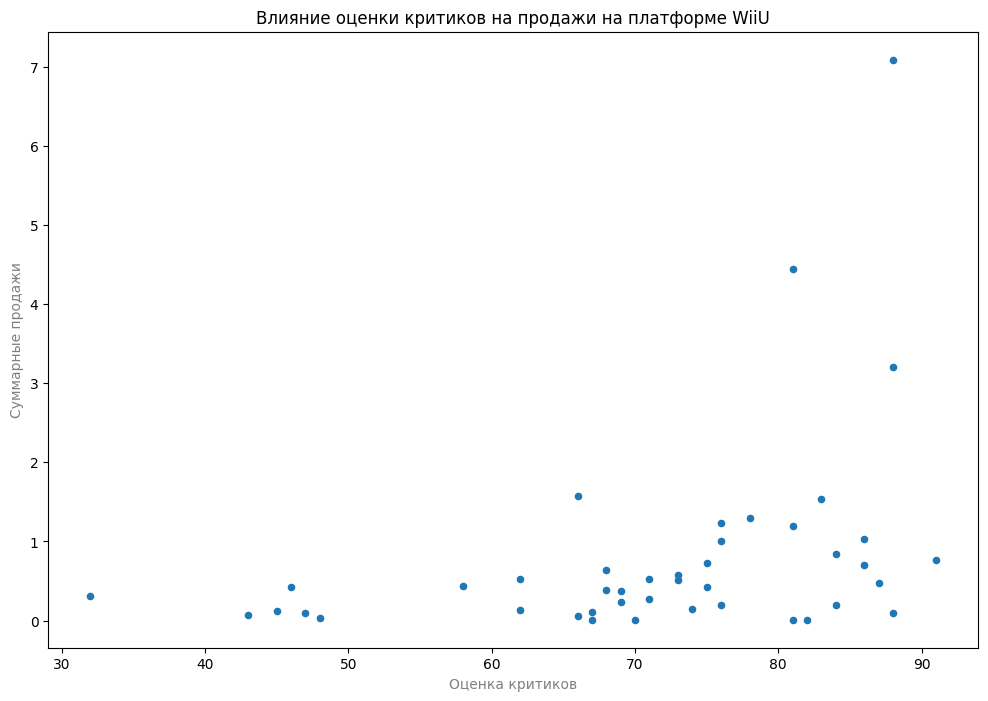

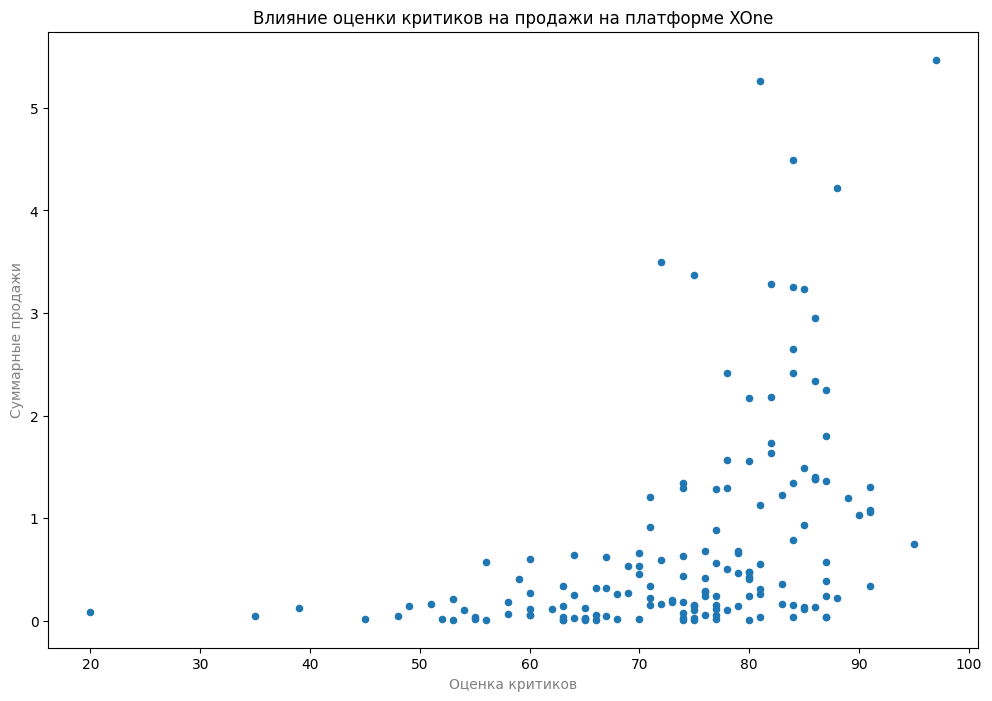

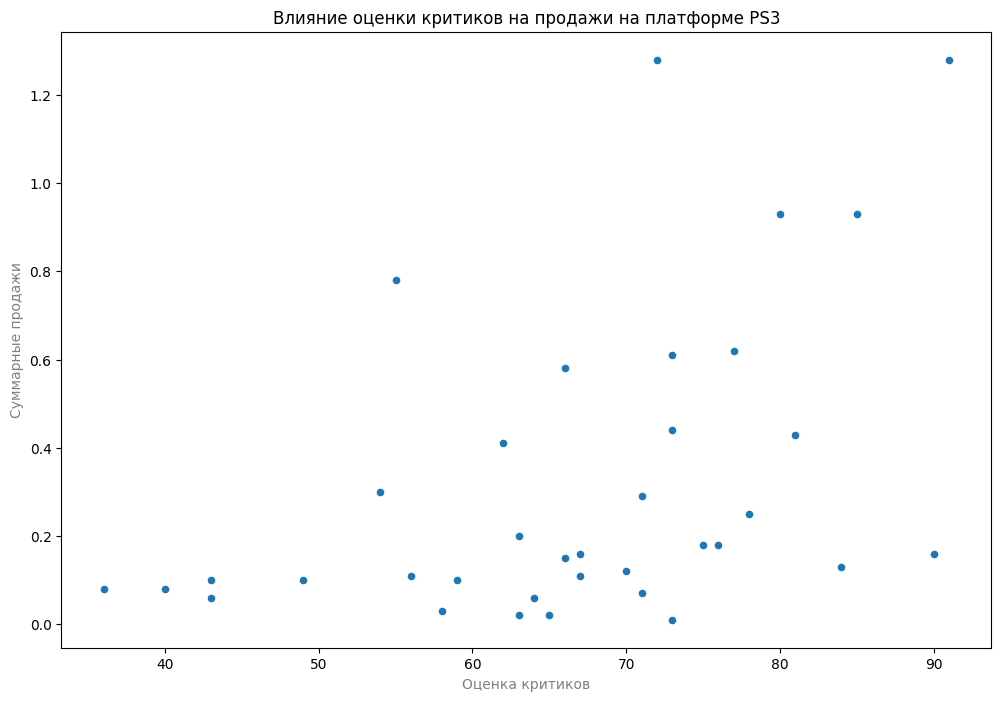

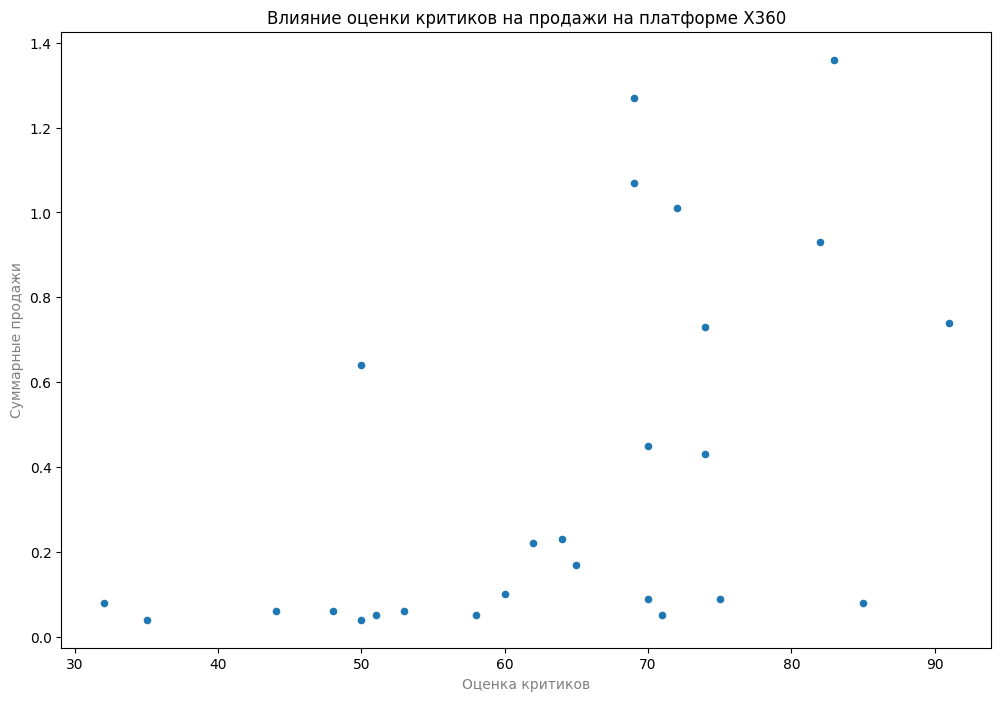

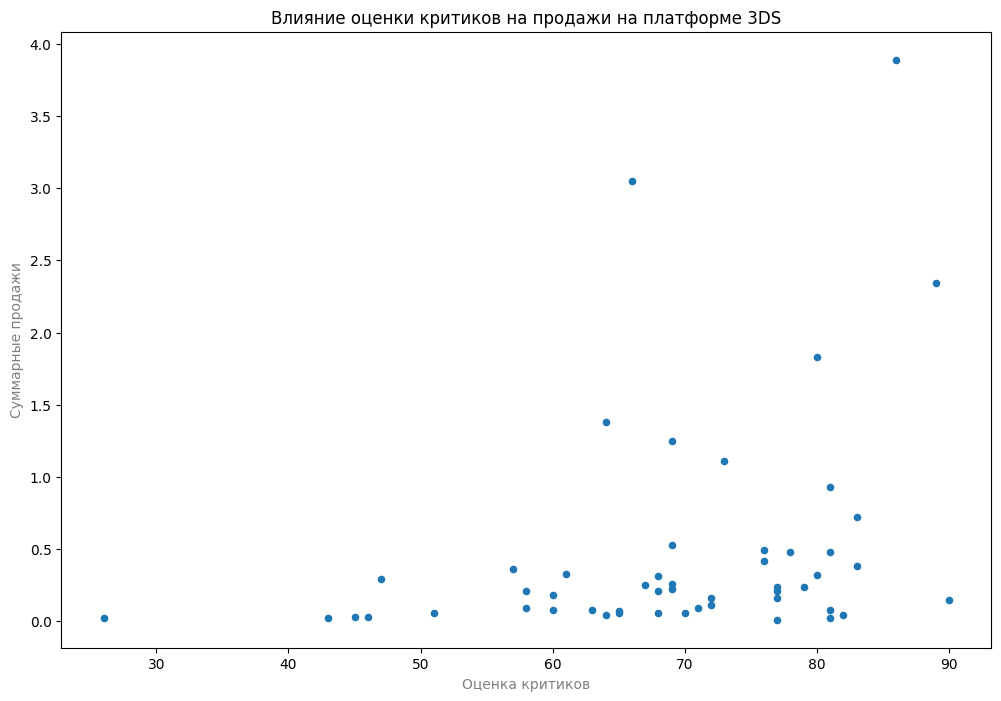

In [89]:
for i in platform:
    scatterplot_critic(i)

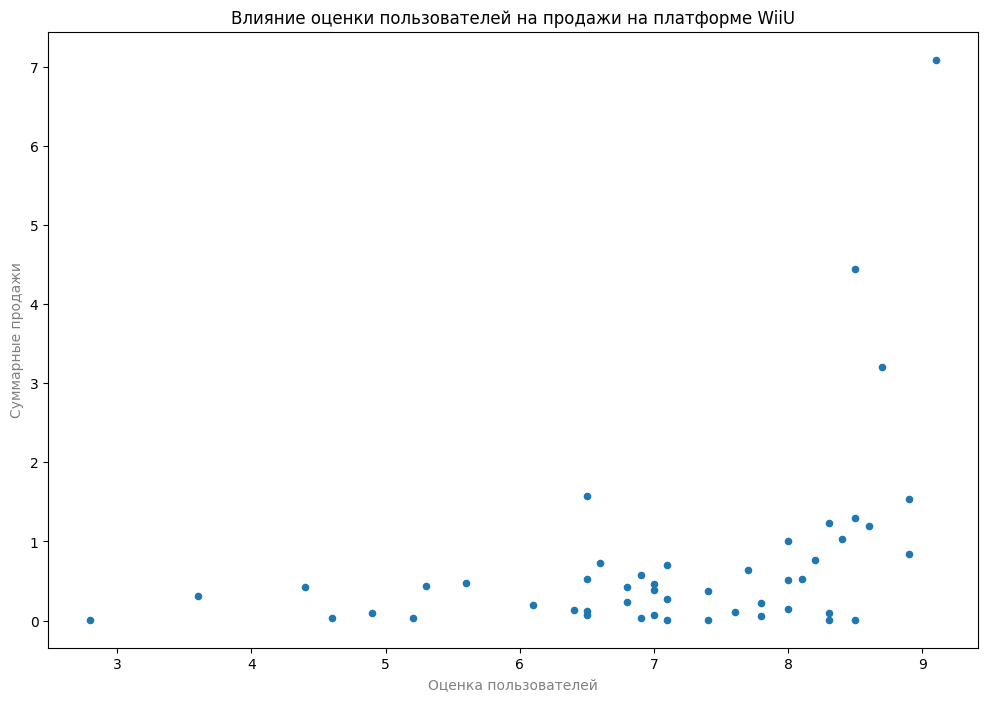

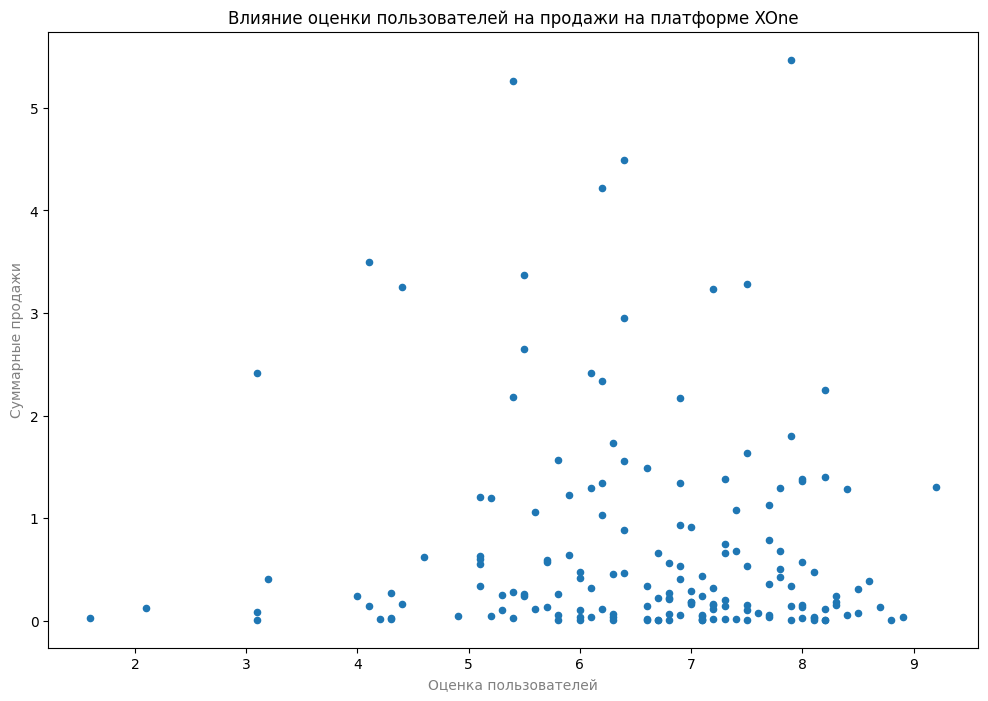

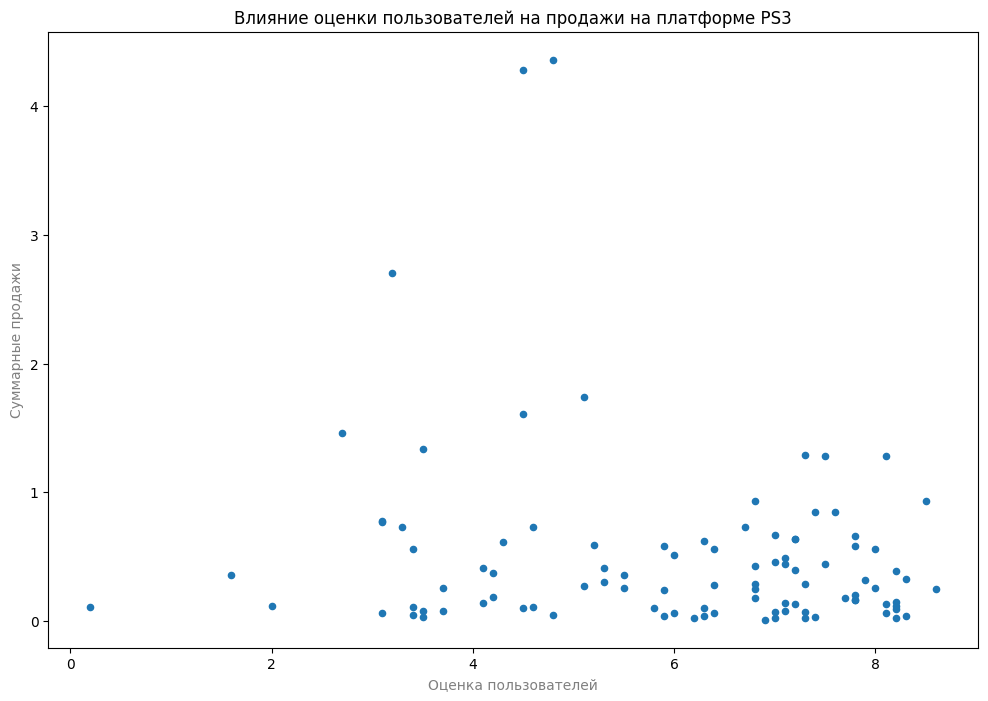

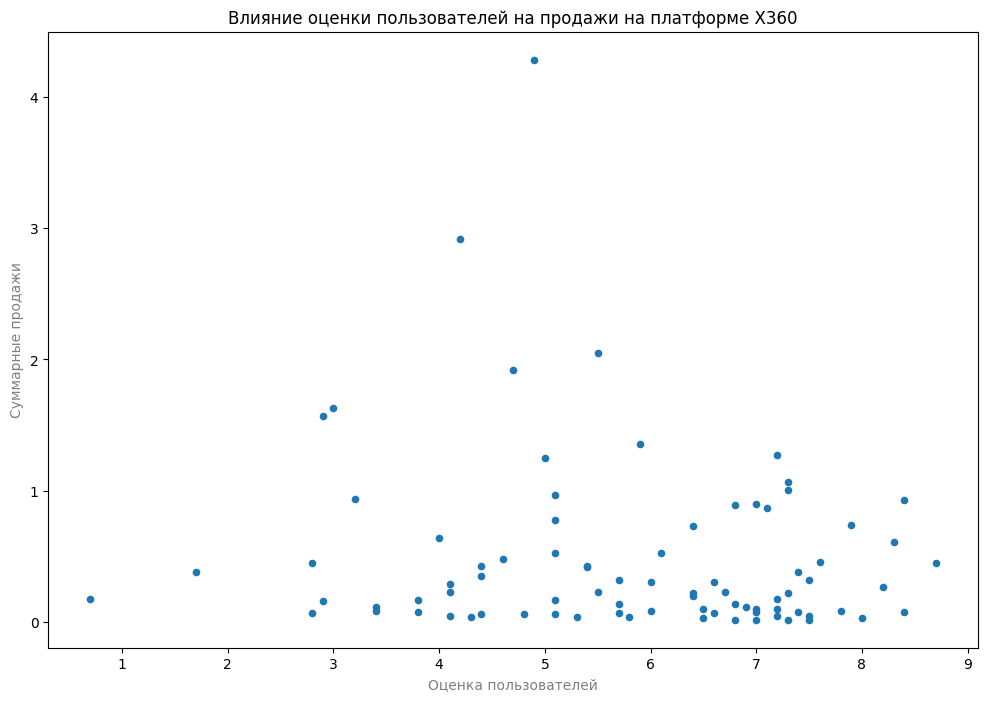

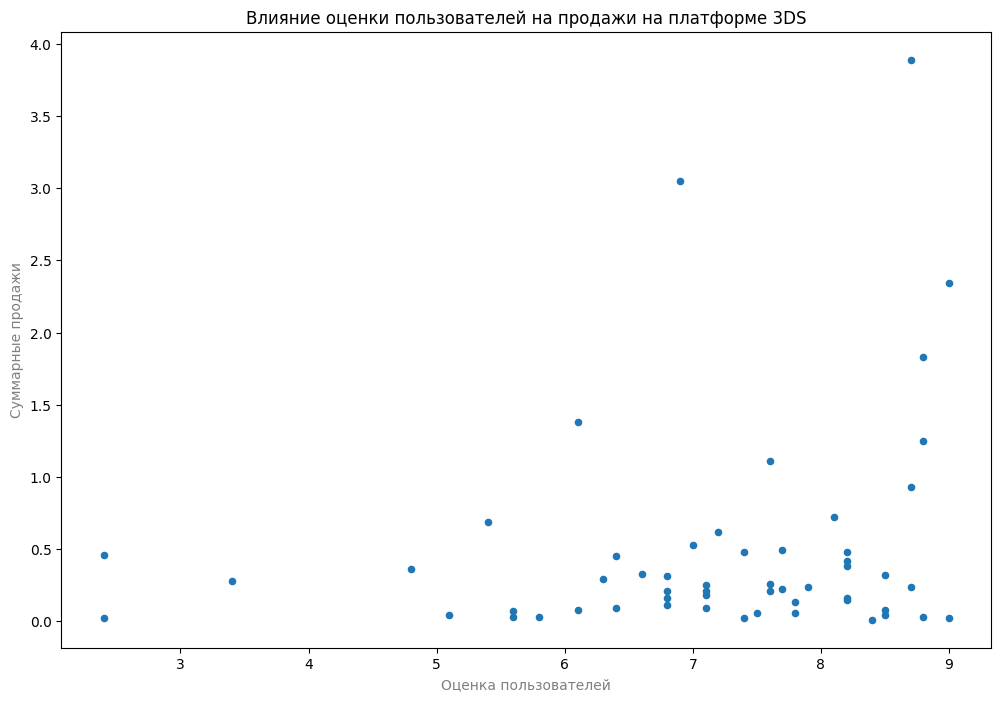

In [90]:
for i in platform:
    scatterplot_user(i)

Таким образом, можно заметить среднее влияние критиков на суммарные продажи, о чем гвоорит коэффициент корреляции примерно равный 0,5. При этом коэффициент корреляции между продажами и оценкой пользователей сильно меньше и гворит о слабой зависимости.

Рассмотрим распределение игр по жанрам.

In [91]:
data_genre = data_act.pivot_table(index=['genre'], values=['sales'], aggfunc='median').sort_values(by='sales', ascending=False)

In [92]:
data_genre

,sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


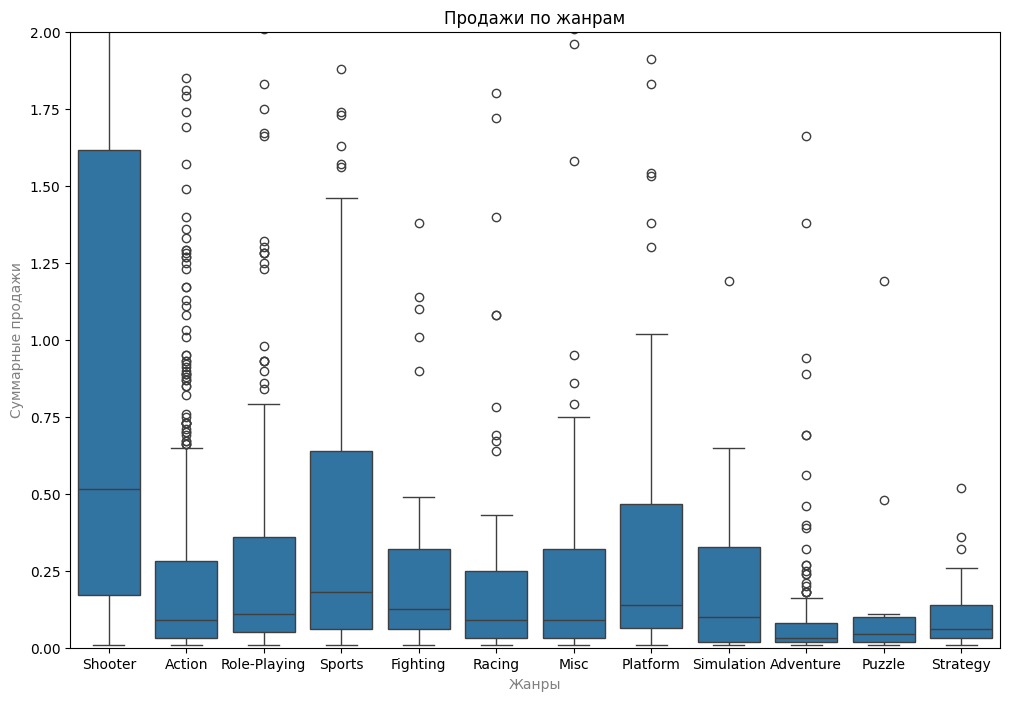

In [93]:
sns.boxplot(x='genre', y='sales', data=data_act).set_ylim(bottom=0, top=2)
plt.title('Продажи по жанрам')
plt.xlabel('Жанры', color='gray')
plt.ylabel('Суммарные продажи', color='gray')
plt.show()

Наиболее продаваемые жанры: shooter, sports, platform. При этом меньше всего продаж в жанрах: puzzle, adventure, strtegy. Наиболее стабильный жанр - shooter.

#### Шаг 4. Портрет пользователя для каждого региона.

1. Определим самые популярные платфоормы для пользователей каждого региона.

In [94]:
data_act

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,not rated,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,not rated,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,not rated,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,not rated,0.01


In [138]:
def pie(str, index, country, name, name1):
    data_region= data_act.pivot_table(index=index, values=[str], aggfunc='sum')
    data_region = data_region.reset_index()
    sum1 = np.round(data_region[str].sum() - data_region.sort_values(by=str, ascending=False)[str].head().sum(), 2)
    data_region = data_region.sort_values(by=str, ascending=False).head()
    new = {index:'Другие', str: sum1}
    data_region = data_region.reset_index(drop=True)
    data_region.loc[len(data_region)] = new
    display(data_region)
    plt.title(f'Доля самых популряных {name} в {country}')
    data_region.groupby(index)[str].sum().plot(kind='pie',autopct='%1.0f%%', ylabel=f'{name1}')
    return plt.show()

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,Другие,34.76


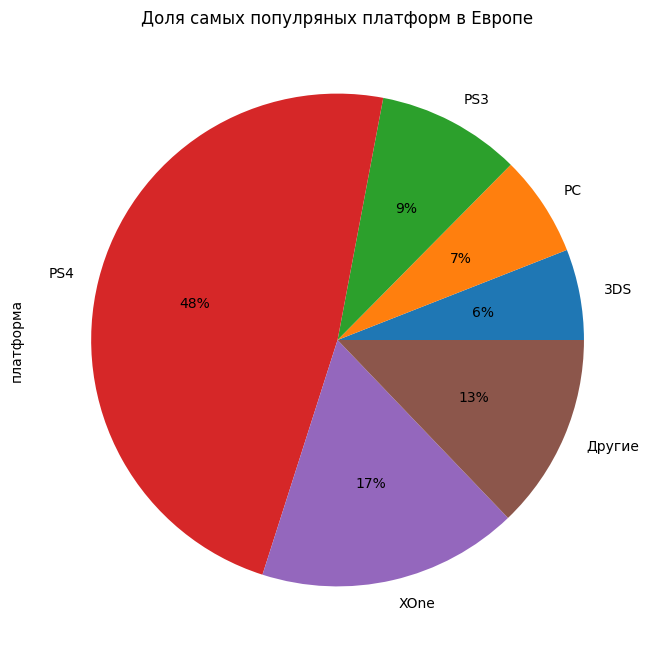

In [139]:
pie('eu_sales','platform', 'Европе', 'платформ', 'платформа')

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,Другие,0.76


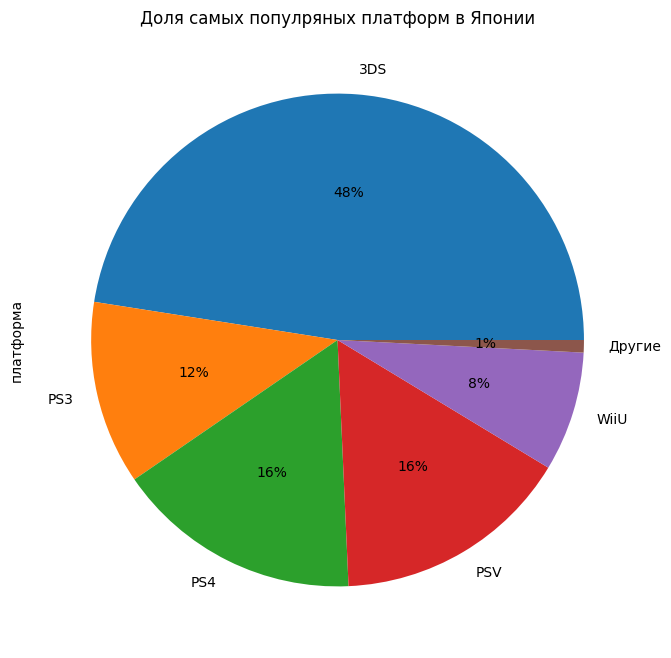

In [140]:
pie('jp_sales','platform', 'Японии','платформ', 'платформа')

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,Другие,31.19


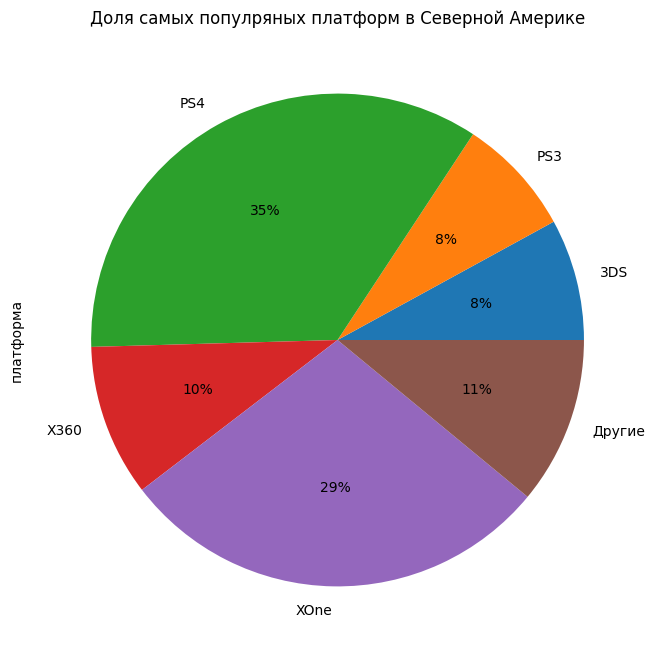

In [141]:
pie('na_sales','platform','Северной Америке','платформ', 'платформа')

Самая популярные плафтормы в Европе - PS4, в Японии - 3DS, в Северной Америке - PS4.


Рассмотрим самые популярные жанры в этих странах.

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Другие,42.45


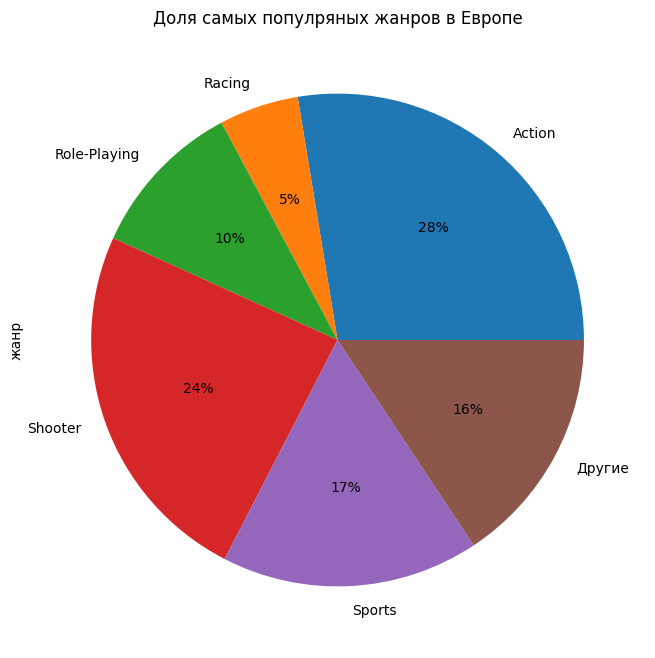

In [142]:
pie('eu_sales','genre', 'Европе', 'жанров', 'жанр')

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Другие,15.50


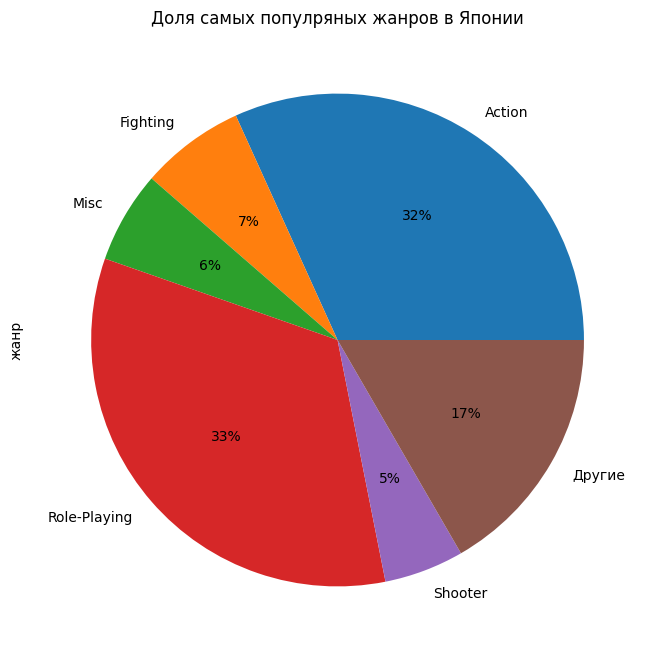

In [143]:
pie('jp_sales','genre', 'Японии', 'жанров', 'жанр')

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Другие,37.86


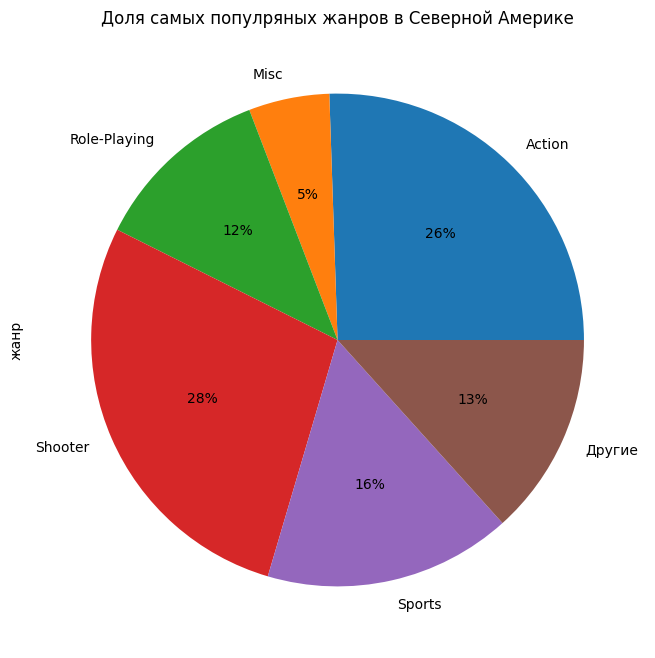

In [144]:
pie('na_sales','genre', 'Северной Америке', 'жанров', 'жанр')

Самые популярыне жанры в Европе - action, shooter , Японии - role-playing, Северной Америке - shooter, action.

Распределния в Еврпое и Севернйо Америке похожи и по жанрам, и по платформам.

Выясним, влияет ли рейтинг esrb на продажи в отдельном регионе.

In [113]:
data_rating = data_act.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

In [114]:
data_rating.sort_values(by='eu_sales', ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
M,93.44,8.01,96.42
not rated,58.95,56.90,64.72
E,58.06,8.94,50.74
T,34.07,14.78,38.95
E10+,26.16,4.46,33.23


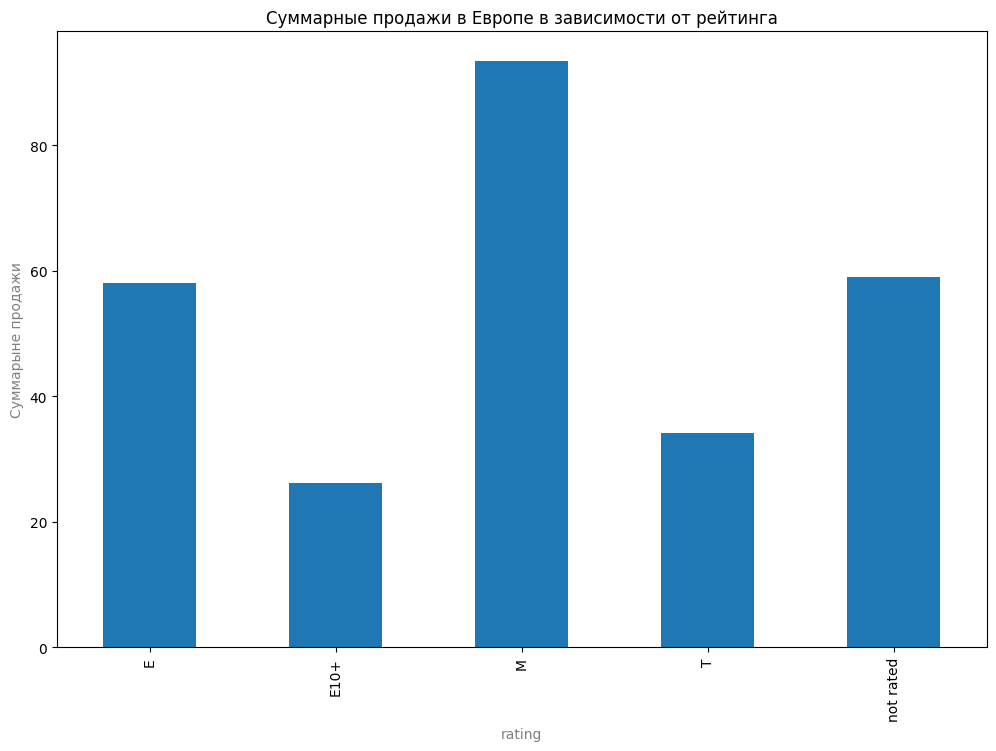

In [115]:
plt.title('Суммарные продажи в Европе в зависимости от рейтинга')
plt.xlabel('Рейтинг', color='gray')
plt.ylabel('Суммарыне продажи', color='gray')
data_rating['eu_sales'].plot(kind='bar')
plt.show()

In [116]:
data_rating.sort_values(by='jp_sales', ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
not rated,58.95,56.90,64.72
T,34.07,14.78,38.95
E,58.06,8.94,50.74
M,93.44,8.01,96.42
E10+,26.16,4.46,33.23


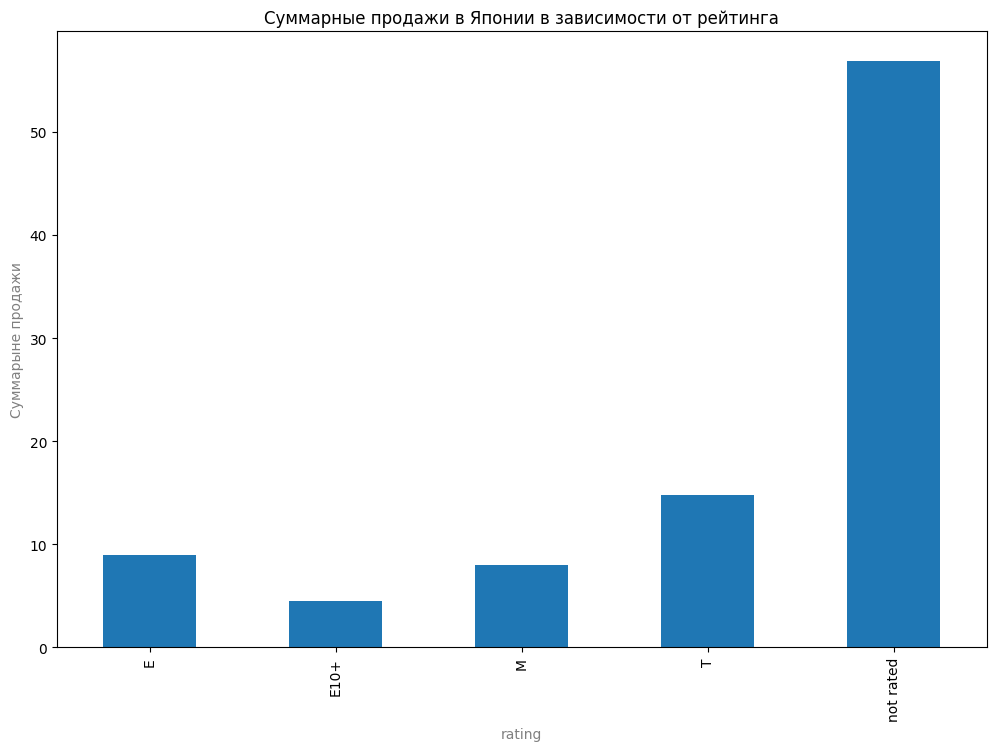

In [117]:
plt.title('Суммарные продажи в Японии в зависимости от рейтинга')
plt.xlabel('Рейтинг', color='gray')
plt.ylabel('Суммарыне продажи', color='gray')
data_rating['jp_sales'].plot(kind='bar')
plt.show()

In [118]:
data_rating.sort_values(by='na_sales', ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
M,93.44,8.01,96.42
not rated,58.95,56.90,64.72
E,58.06,8.94,50.74
T,34.07,14.78,38.95
E10+,26.16,4.46,33.23


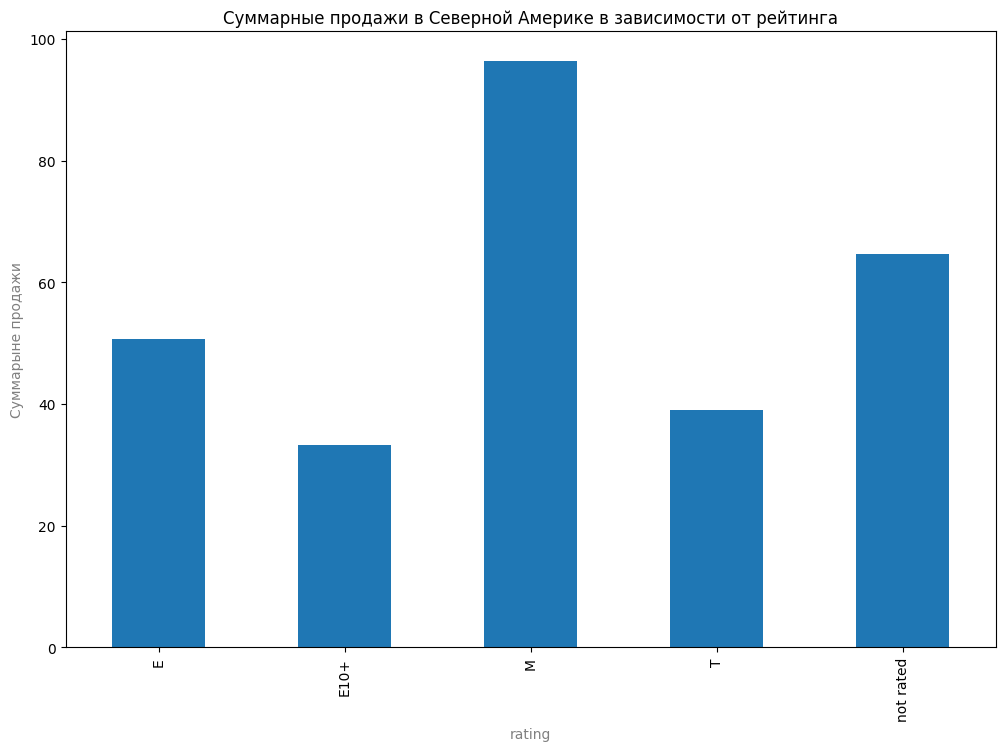

In [119]:
plt.title('Суммарные продажи в Северной Америке в зависимости от рейтинга')
plt.xlabel('Рейтинг', color='gray')
plt.ylabel('Суммарыне продажи', color='gray')
data_rating['na_sales'].plot(kind='bar')
plt.show()

In [120]:
data_act['rating'].value_counts()

rating
not rated    749
T            271
M            265
E            219
E10+         185
Name: count, dtype: int64

Отбросив значения с неопределнным рейтингом, можно сказать, что в Европе и Северной Америке больше всего игр было продано рейтинга M, в Японии - рейтинга Т, Европе -М. Так как рейтинг esrb существует для стран Северной Америки, то особое внимание следует уделить играм с рейтингом М.

#### Шаг 5. Проверим гипотезы

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br>H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Возьмем актуальные данные без заглушек.

In [121]:
data_act_user

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
1664,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
1667,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1,6.6,E,0.01
1670,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01
1672,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,not rated,0.01


In [122]:
print('Средний пользовательский рейтинг платформы Xbox One:', np.round(data_act_user.query('platform == "XOne"')['user_score'].mean(), 2))

Средний пользовательский рейтинг платформы Xbox One: 6.59


In [123]:
print('Средний пользовательский рейтинг платформы PC:', np.round(data_act_user.query('platform == "PC"')['user_score'].mean(), 2))

Средний пользовательский рейтинг платформы PC: 6.3


In [124]:
res1 = st.ttest_ind(data_act_user.query('platform == "XOne"')['user_score'], data_act_user.query('platform == "PC"')['user_score'])

In [125]:
res1.pvalue

0.10450507919348415

In [126]:
if res1.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


Таким образом, нулевая гипотеза не отвержена, а значит, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
<br>H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [128]:
print('Средний пользовательский рейтинг жанра action:', np.round(data_act_user.query('genre == "Action"')['user_score'].mean(), 2))

Средний пользовательский рейтинг жанра action: 6.76


In [129]:
print('Средний пользовательский рейтинг жанра sports:', np.round(data_act_user.query('genre == "Sports"')['user_score'].mean(), 2))

Средний пользовательский рейтинг жанра sports: 5.23


In [130]:
res2 = st.ttest_ind(data_act_user.query('genre == "Action"')['user_score'], data_act_user.query('genre == "Sports"')['user_score'])

In [131]:
res2.pvalue

2.8711147985105864e-19

In [132]:
if res2.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


На уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

### Вывод
Исходные данные - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. На первом этапе мы выявили и заполнили средним значенимяи пропуски, где это было возможно. Удалили дубликаты в данных по строке название-жанр-год выпуска. А также добавили столбец с общим количеством проданных копий во всех регионах.
На втором оценили как стоит распределять кампанию на 2017 год:
1. Платформы PS4, XOne, WiiU - находятся на этaпе своего роста и развития, поэтому основные суммарные продажи следует ожидать от этих платформ. Особое внимание следует уделить плафторпме PS4, так как в предыдущие годы предшествующие выерси платформы PS2 и PS3 были самыми популярными в Северной Америке и Европе, а также количество миллионов копий проданных на джанной платформе сущесвтенно выше, чем на остальных. 
2. Наиболее популярные жанры игр shooter, sports, platformr. 
3. Вляиние оценки критиков на суммарные продажи среднее. Оценки пользователей незначительно влияют на продажи.
4. Игры с рейтингом Е имеют большее количество проданных копий. При этом певрончально игр с таким рейтингом больше остальных, а также большое количество игр не имеющих рейтинг. Для более подробного анализа рекомендуется улучшить сбор данных, уменьшить пропущенные значения. 
<br>На третьем эатпе были проверены 2 гипотезы, обе из которых не удалось опровергнуть, это значит, что мы можем говорить о том, что:
<br>1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
<br>2. Средние пользовательские рейтинги жанров Action и Sports одинаковые. 

Таким образом, рекламный бюджет следует выделить на платфору PS4 c жанром Shooter и рейтингом М, рекламировать в регмонах Северной Америки и Европы. Отзывы критиков и пользователей незначительно влияют на продажи, поэтому на них обращать внимание не стоит.